In [ ]:
import pandas as pd
pd.set_option('display.max_row',40)
pd.set_option('display.max_column',100)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import seaborn as sns
import missingno as ms
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.colors

# nltk
import nltk


In [ ]:
# Define the file path
file_path = '/content/MetS Data.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to ensure it was loaded correctly
df.head()

,Age,Gender,Systolic BP,Diastolic BP,BMI,Waist Circumference,Family History,Carb Intake,Fat Intake,Balanced Diet,Sugary Beverage Intake,Fruits & Vegetables Consumption,Physical Activity Level,Smoking Status,Cigarettes per Day,Sleep duration,Obesity,Stress,Blood Sugar Fasting,Blood Sugar Random,Cholesterol,Triglycerides,High-Density Lipoprotein (HDL),LDL,MetS (1/0)
0,54,1,120,80,31.8,106.68,0,0,0,1,0,1,1,0,0,1,1,0,4.6,NaN,4.9,2.1,0.98,0.80,0
1,27,1,120,67,20.9,208.28,0,1,0,0,0,1,2,0,0,1,1,0,NaN,6.8,3.2,0.8,0.64,2.10,0
2,50,0,110,65,35.9,101.60,0,1,0,0,1,1,1,0,0,1,1,1,4.8,NaN,4.5,2.0,0.90,0.70,1
3,26,0,98,64,22.2,76.20,1,1,1,0,0,1,1,0,0,1,0,1,4.5,NaN,3.5,1.3,0.70,0.68,0
4,27,1,120,80,27.3,90.00,1,1,0,0,0,3,0,0,0,1,0,0,NaN,6.1,4.6,1.9,0.92,0.80,0


(-1.0999986485957567,
 1.0999921043733203,
 -1.0999999823436024,
 1.099999999159219)

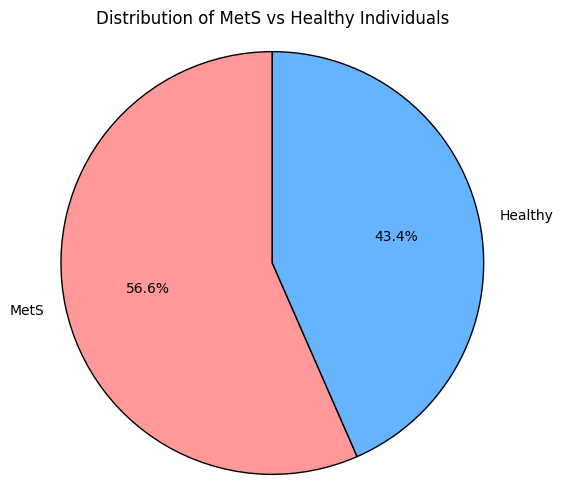

In [ ]:
# Counting the number of patients with and without MetS
MetS_counts = df['MetS (1/0)'].value_counts()

# Labels for the pie chart
labels = ['MetS', 'Healthy']

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(MetS_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'],
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of MetS vs Healthy Individuals')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.


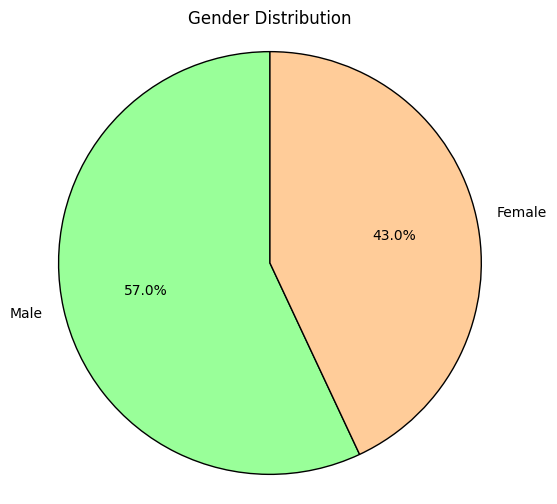

,count
Gender,
1,286
0,216


In [ ]:
# Counting the number of males and females
gender_counts = df['Gender'].value_counts()

# Labels for the pie chart
gender_labels = ['Male', 'Female']

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['#99ff99','#ffcc99'],
        wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Displaying the pie chart
plt.show()

gender_counts

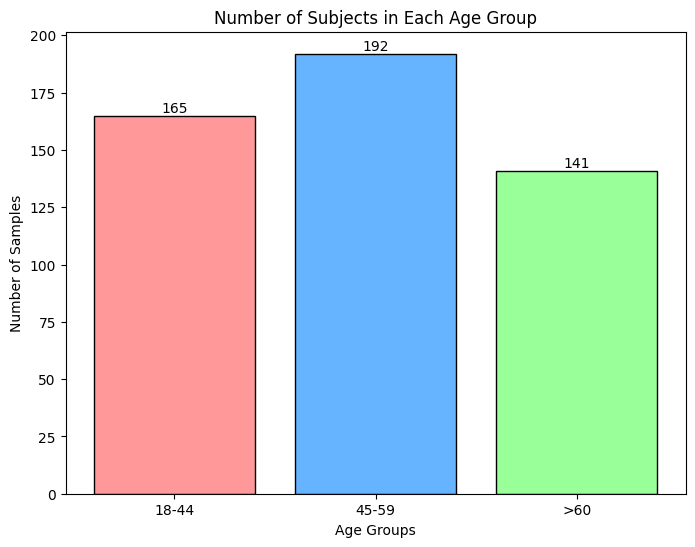

,count
Age Group,
18-44,165
45-59,192
>60,141


In [ ]:
# Defining age groups
age_bins = [18, 44, 59, float('inf')]
age_labels = ['18-44', '45-59', '>60']

# Creating age groups
df['Age Group'] = pd.cut(df[' Age'], bins=age_bins, labels=age_labels, right=False)

# Counting the number of samples in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Creating the bar chart with values on each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color=['#ff9999','#66b3ff','#99ff99'], edgecolor='black')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

# Labeling the chart
plt.xlabel('Age Groups')
plt.ylabel('Number of Samples')
plt.title('Number of Subjects in Each Age Group')
plt.xticks(rotation=0)

# Displaying the bar chart
plt.show()

# Output the counts for each age group
age_group_counts

In [ ]:
print(df.columns)


Index([' Age', 'Gender', 'Systolic BP', 'Diastolic BP', 'BMI',
       'Waist Circumference', 'Family History ', 'Carb Intake', 'Fat Intake',
       'Balanced Diet', 'Sugary Beverage Intake',
       'Fruits & Vegetables Consumption', 'Physical Activity Level ',
       'Smoking Status', 'Cigarettes per Day', 'Sleep duration', 'Obesity ',
       ' Stress', 'Blood Sugar Fasting ', 'Blood Sugar Random ', 'Cholesterol',
       'Triglycerides', 'High-Density Lipoprotein (HDL)', 'LDL', 'MetS (1/0)',
       'Age Group'],
      dtype='object')


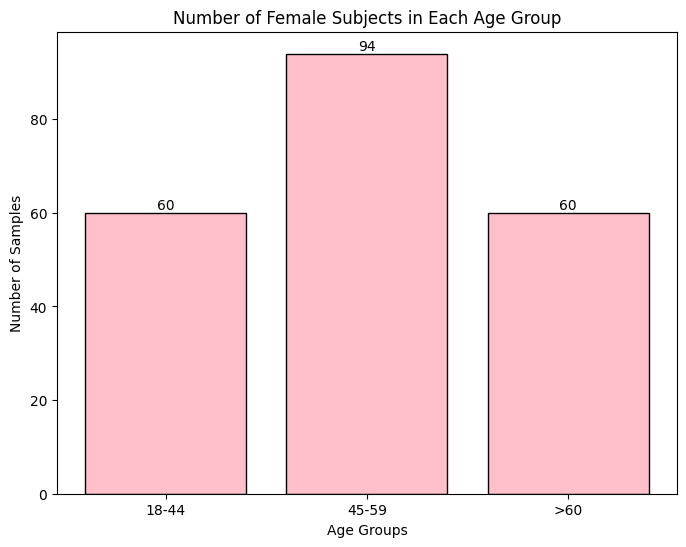

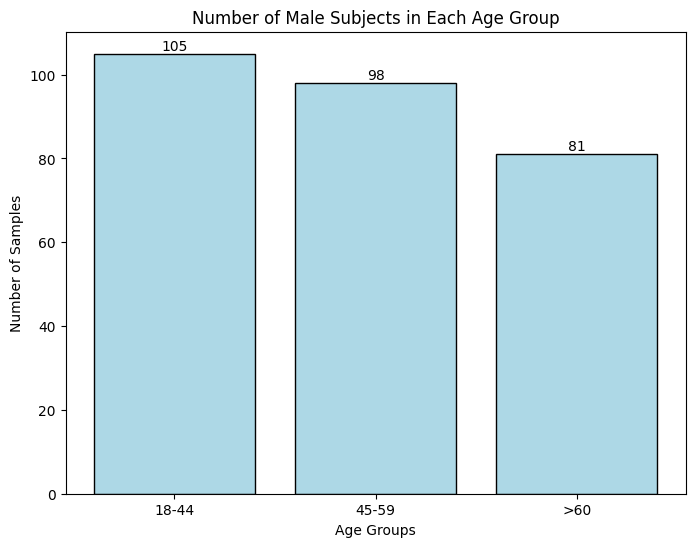

(Age Group
 18-44    60
 45-59    94
 >60      60
 Name: count, dtype: int64,
 Age Group
 18-44    105
 45-59     98
 >60       81
 Name: count, dtype: int64)

In [ ]:
# Defining age groups
age_bins = [18, 44, 59, float('inf')]
age_labels = ['18-44', '45-59', '>60']

# Creating age groups
df['Age Group'] = pd.cut(df[' Age'], bins=age_bins, labels=age_labels, right=False)

# Count for females (Gender == 0)
df_females = df[df['Gender'] == 0]
female_age_group_counts = df_females['Age Group'].value_counts().sort_index()

# Count for males (Gender == 1)
df_males = df[df['Gender'] == 1]
male_age_group_counts = df_males['Age Group'].value_counts().sort_index()

# Creating bar chart for females
plt.figure(figsize=(8, 6))
female_bars = plt.bar(female_age_group_counts.index, female_age_group_counts.values, color='pink', edgecolor='black')
plt.title('Number of Female Subjects in Each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Samples')

# Adding values on top of each bar
for bar in female_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

# Creating bar chart for males
plt.figure(figsize=(8, 6))
male_bars = plt.bar(male_age_group_counts.index, male_age_group_counts.values, color='lightblue', edgecolor='black')
plt.title('Number of Male Subjects in Each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Samples')

# Adding values on top of each bar
for bar in male_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

# Output counts for both gender age groups
female_age_group_counts, male_age_group_counts

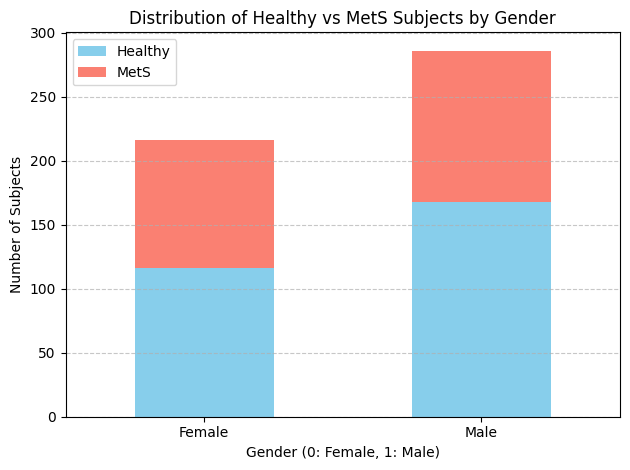

MetS (1/0)    0    1
Gender              
0           116  100
1           168  118


In [ ]:
# Grouping by gender and MetS status
gender_mets_distribution = df.groupby(['Gender', 'MetS (1/0)']).size().unstack(fill_value=0)

# Plotting the distribution
gender_mets_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Distribution of Healthy vs MetS Subjects by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of Subjects')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['Healthy', 'MetS'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Print the distribution counts
print(gender_mets_distribution)

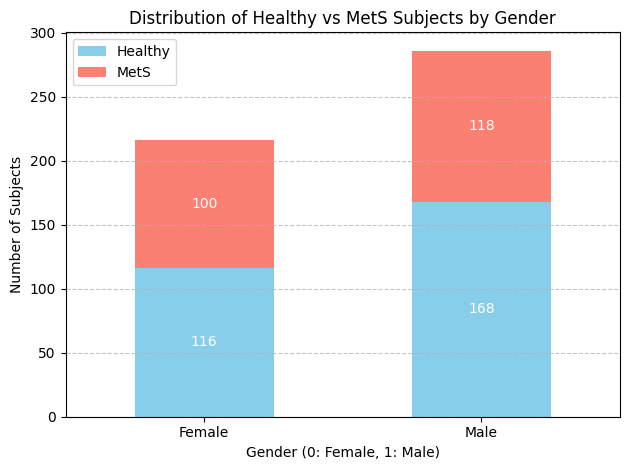

MetS (1/0)    0    1
Gender              
0           116  100
1           168  118


In [ ]:
# Grouping by gender and MetS status
gender_mets_distribution = df.groupby(['Gender', 'MetS (1/0)']).size().unstack(fill_value=0)

# Plotting the distribution
ax = gender_mets_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Distribution of Healthy vs MetS Subjects by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of Subjects')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['Healthy', 'MetS'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value counts on top of the bars
for i in range(gender_mets_distribution.shape[0]):
    total_height = 0
    for j in range(gender_mets_distribution.shape[1]):
        height = gender_mets_distribution.values[i][j]
        total_height += height
        ax.text(i, total_height - height / 2, str(height), ha='center', va='center', color='white')

# Display the plot
plt.tight_layout()
plt.show()

# Print the distribution counts
print(gender_mets_distribution)

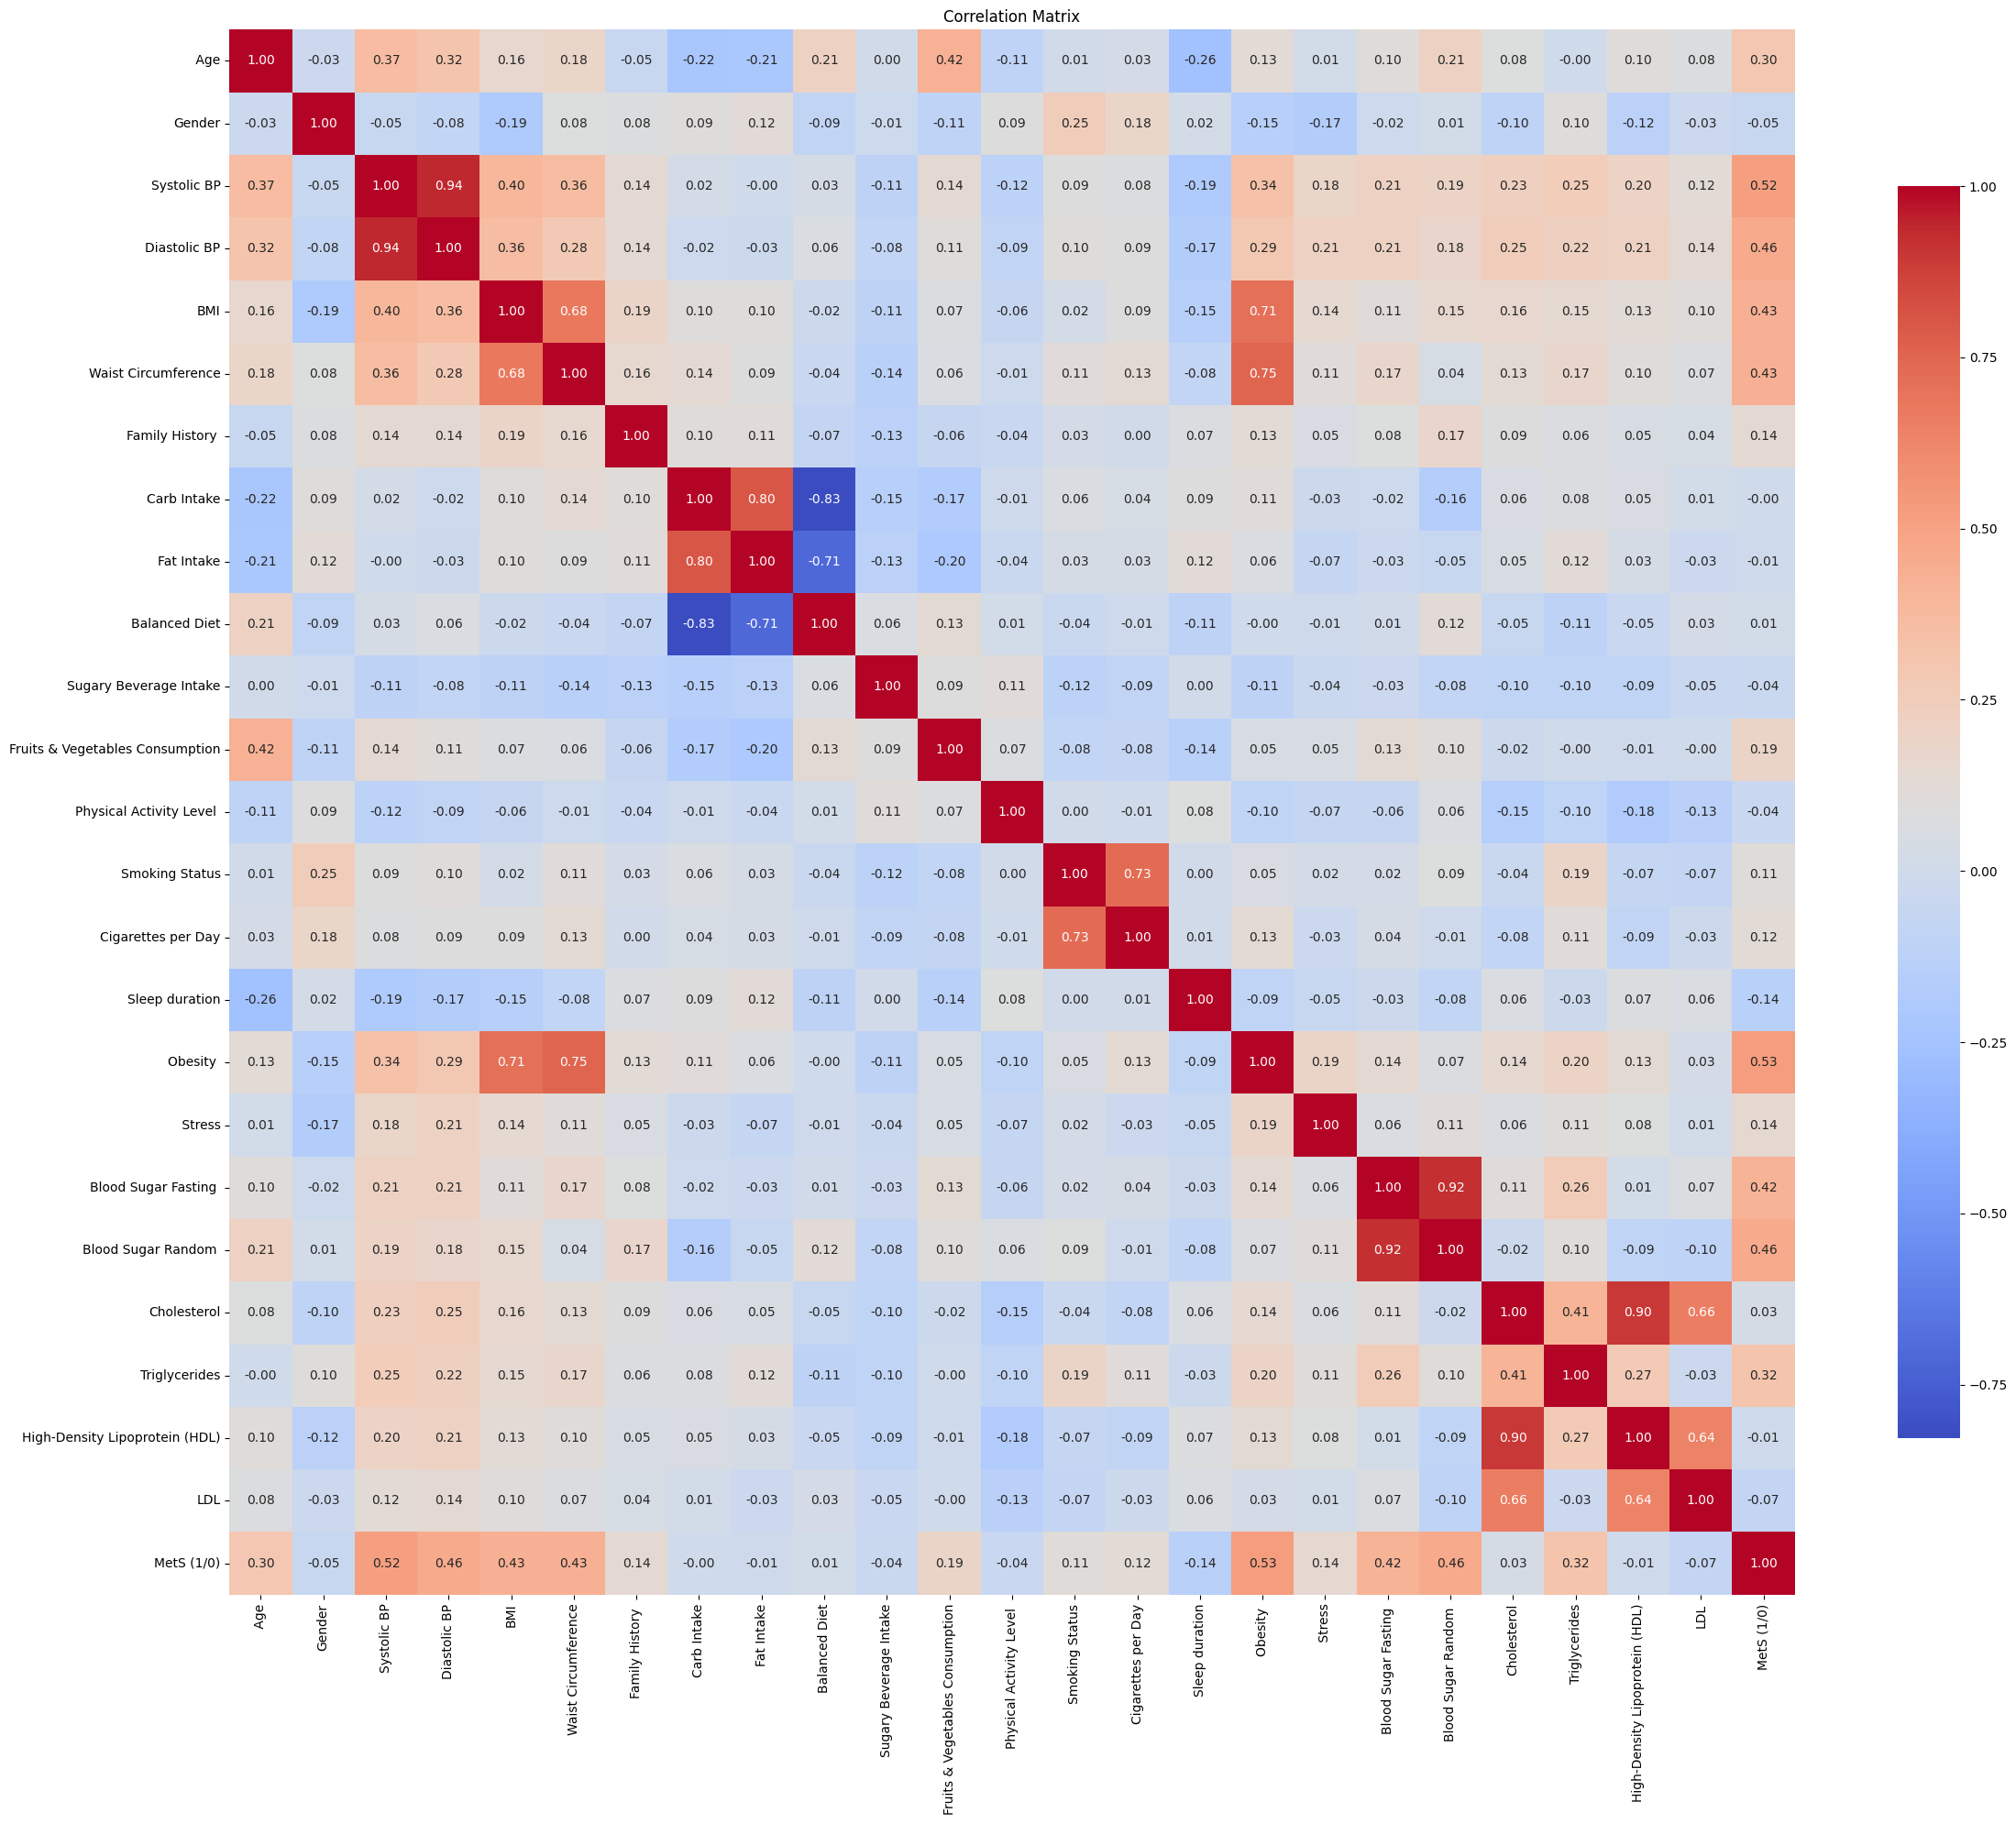

In [ ]:

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 20))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.tight_layout()
plt.show()


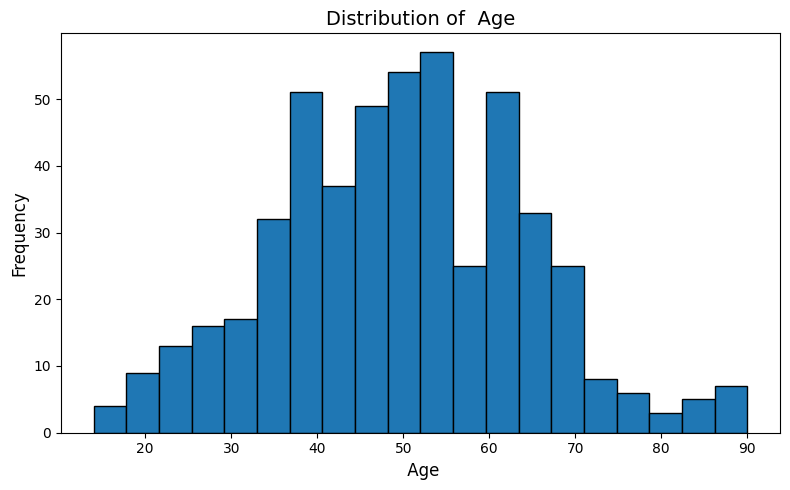

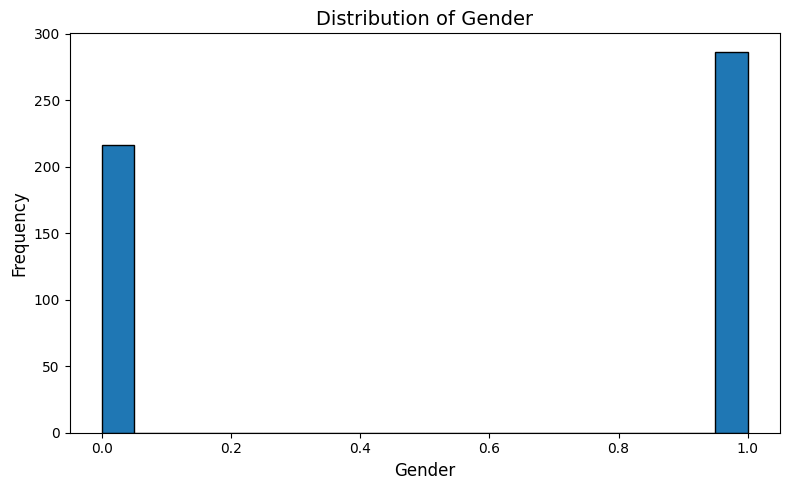

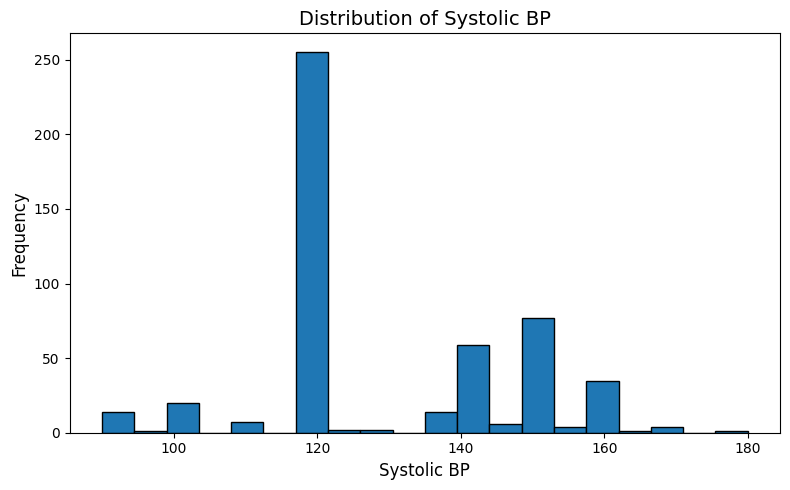

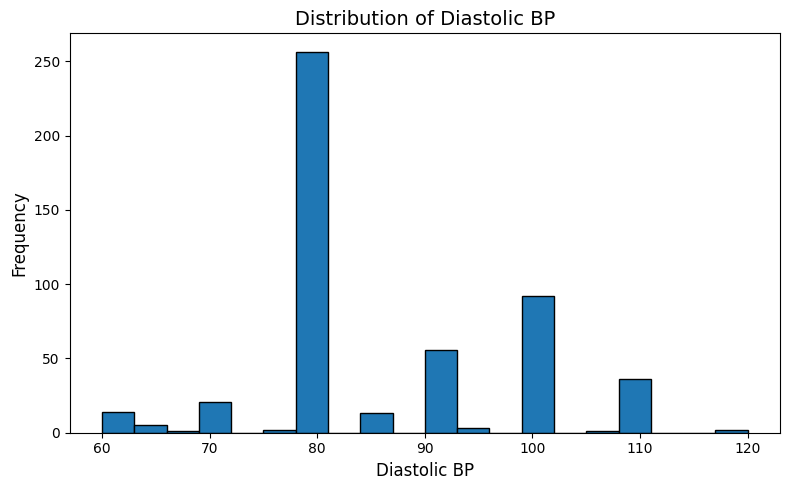

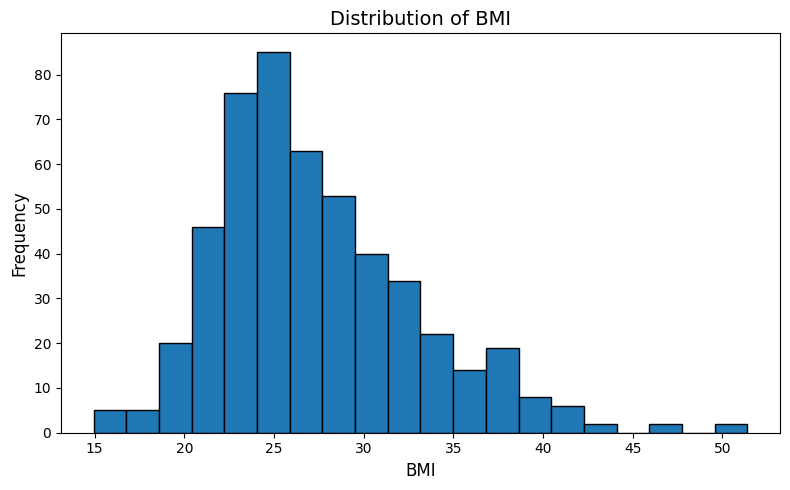

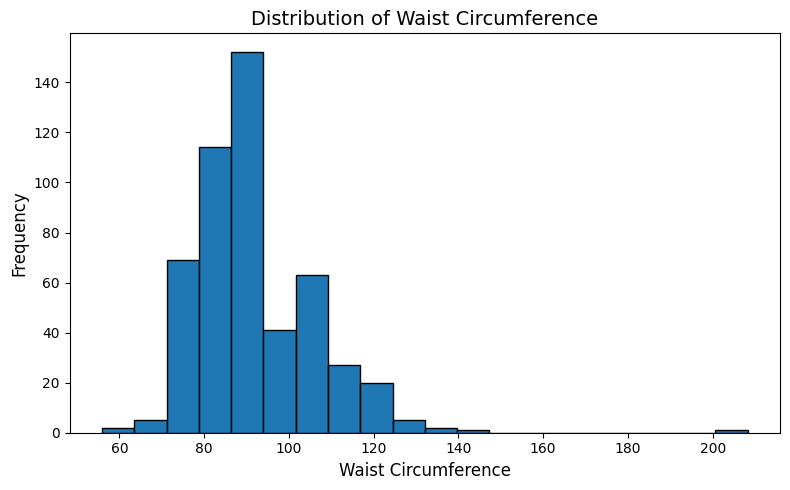

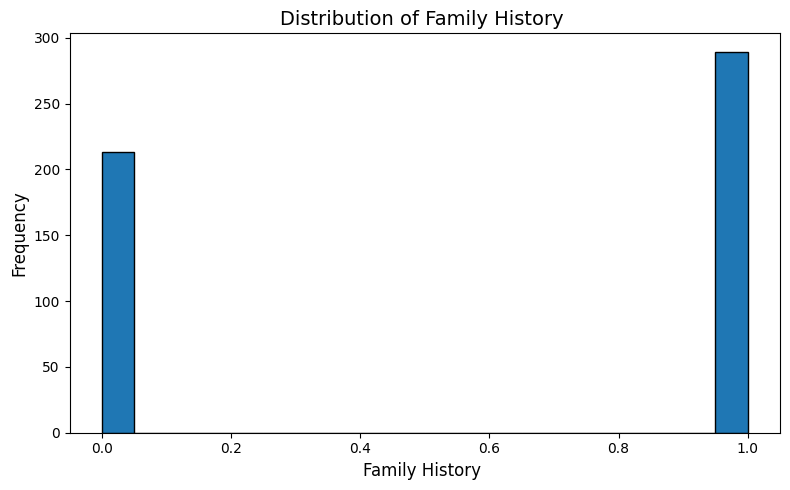

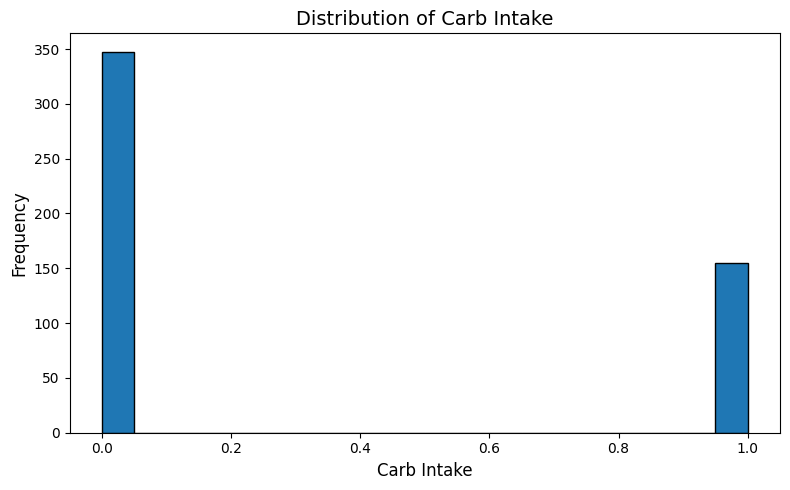

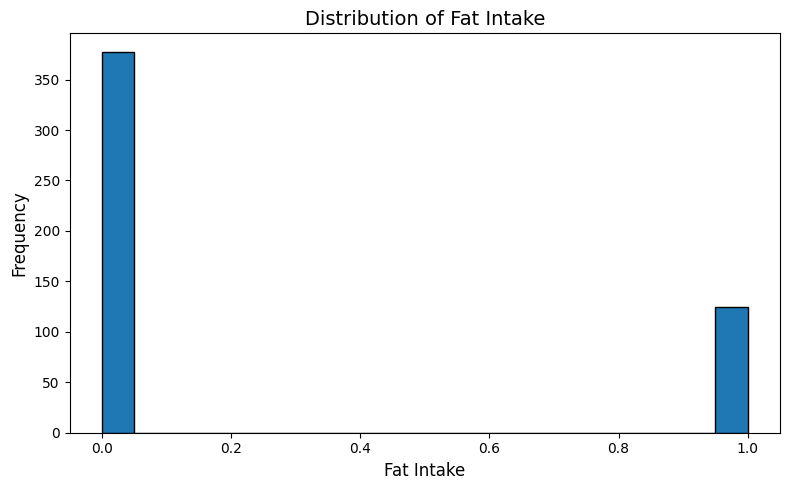

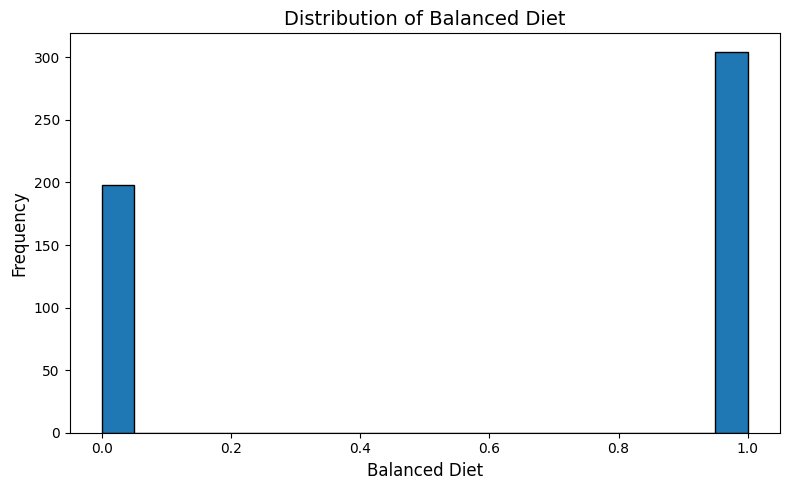

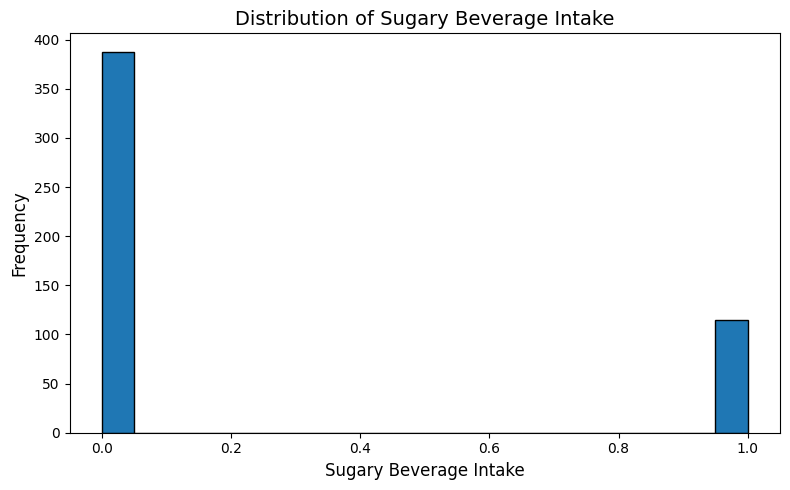

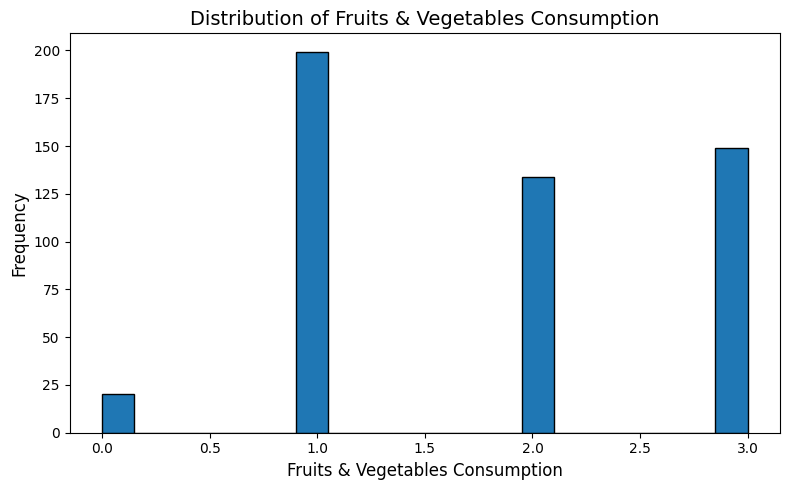

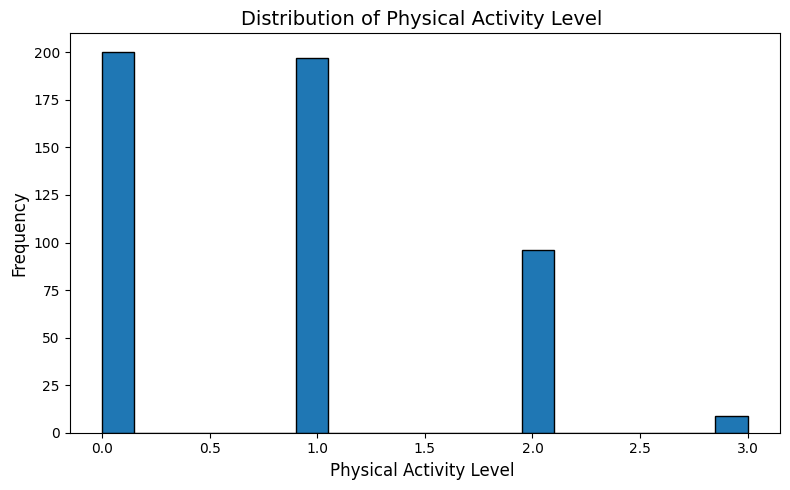

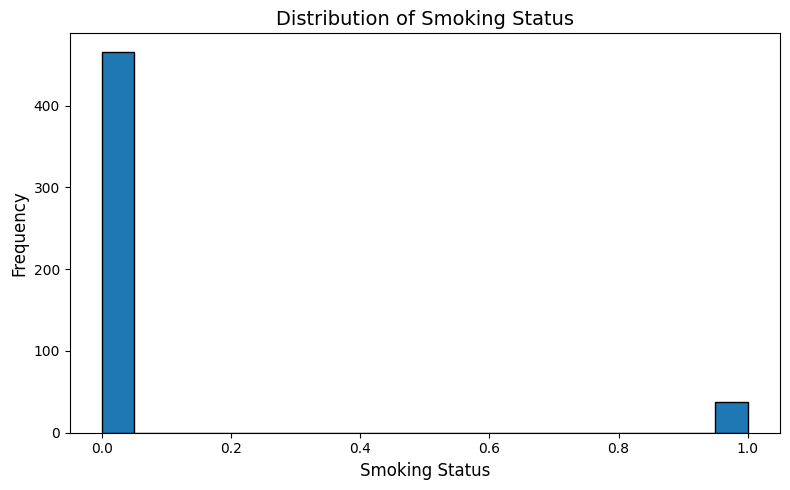

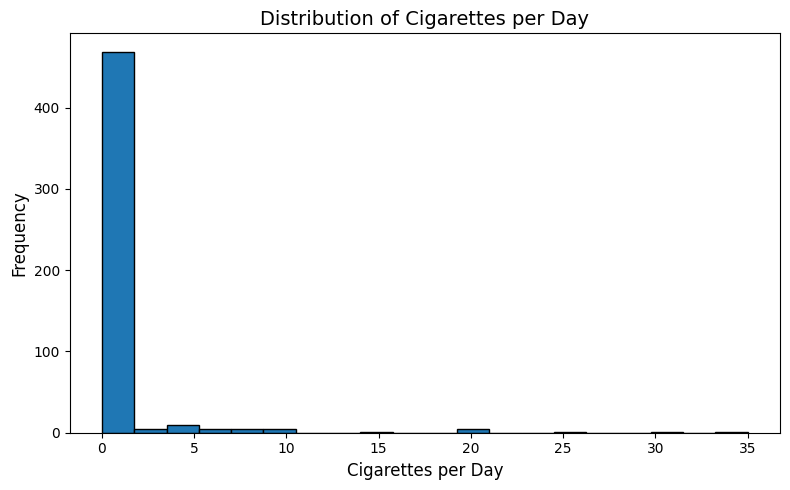

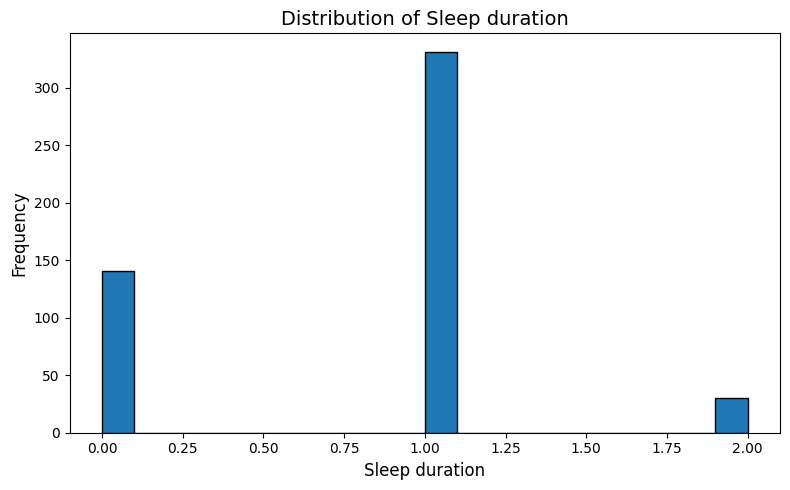

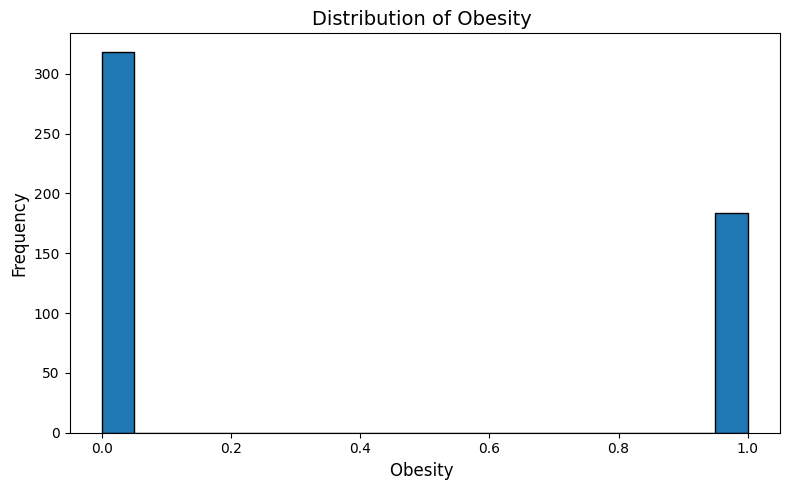

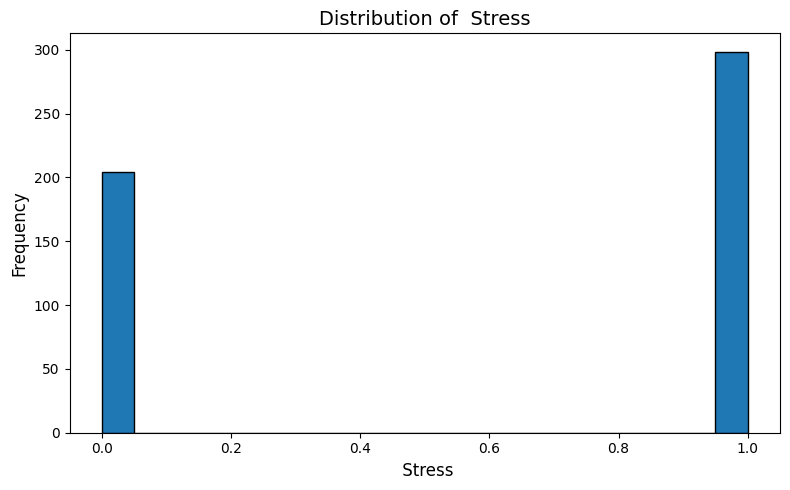

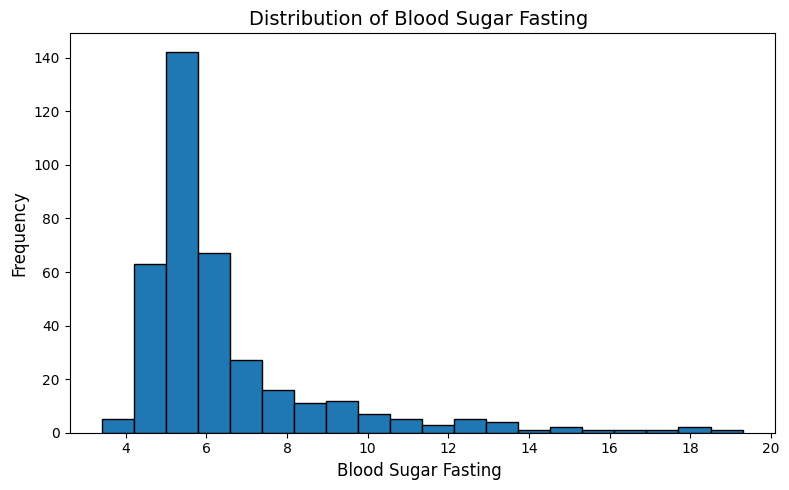

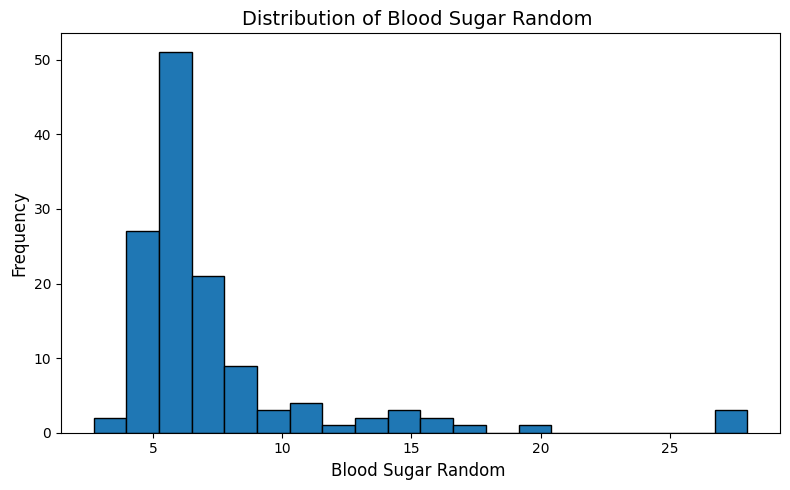

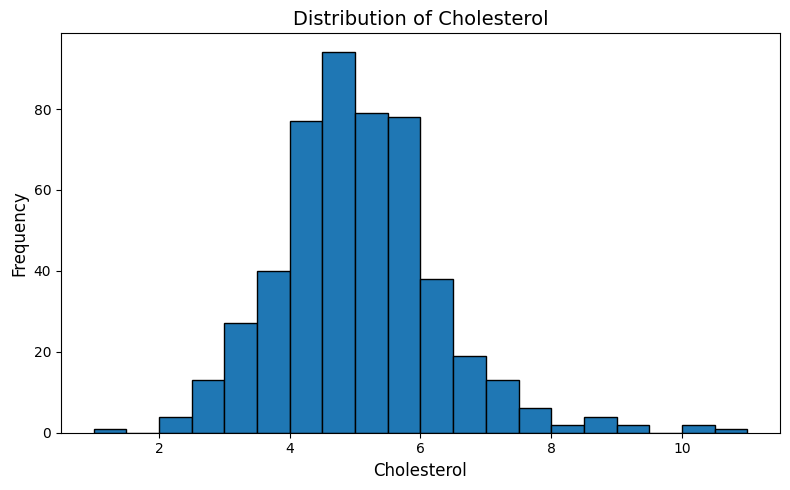

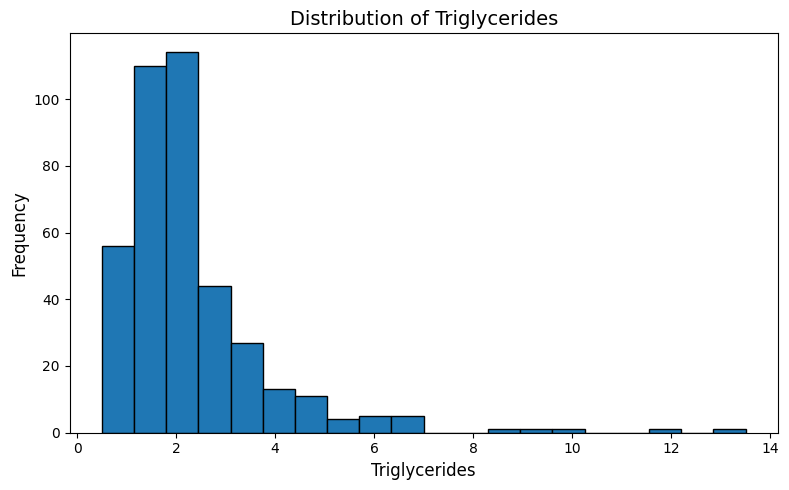

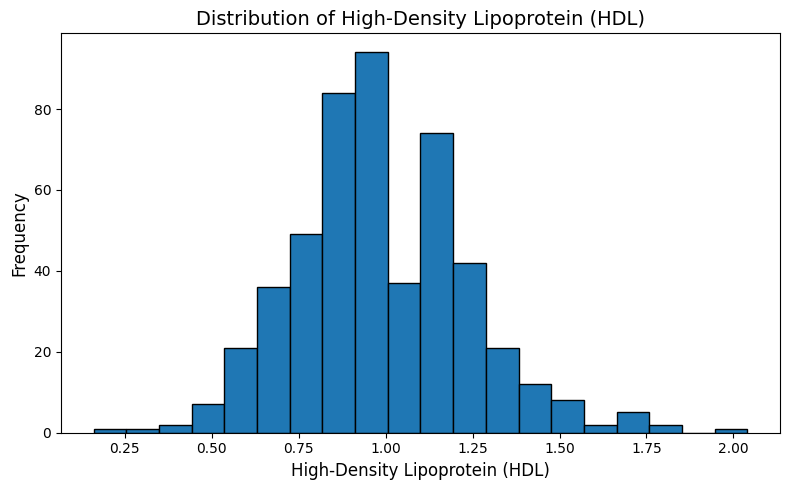

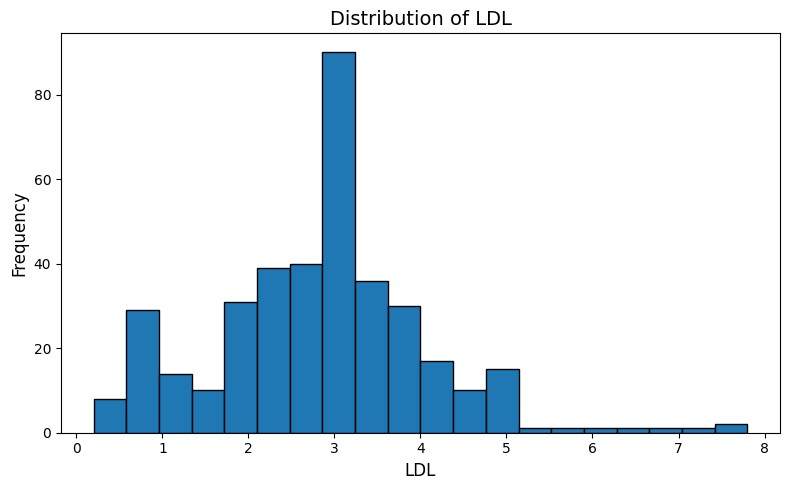

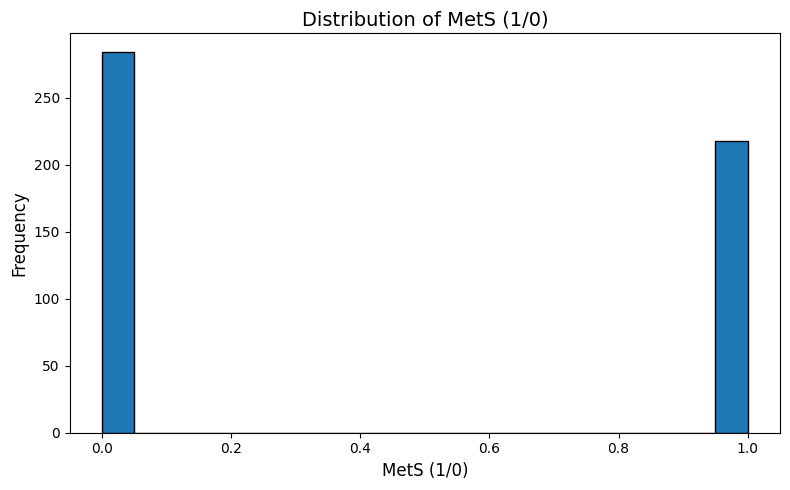

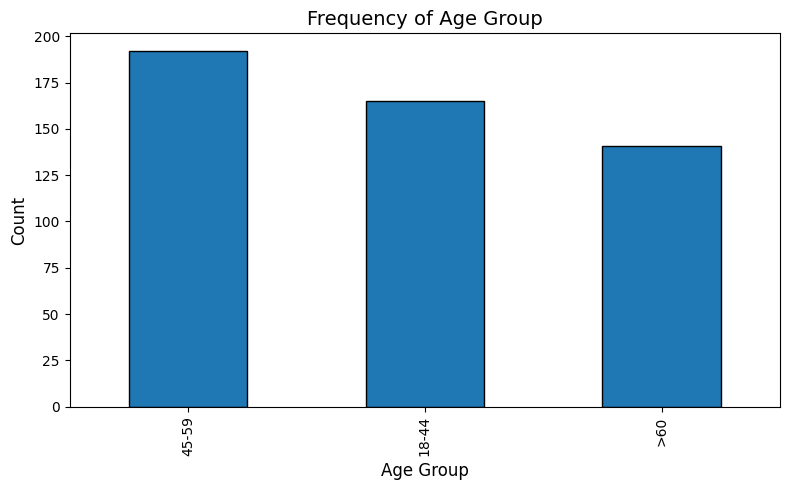

In [ ]:
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
categorical_columns = df.select_dtypes(include=[object, 'category']).columns

# Plot histograms for numerical columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    df[column].hist(bins=20, edgecolor='black', grid=False)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot bar charts for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Frequency of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Systolic BP,0
Diastolic BP,0
BMI,0
Waist Circumference,0
Family History,0
Carb Intake,0
Fat Intake,0
Balanced Diet,0


<Axes: >

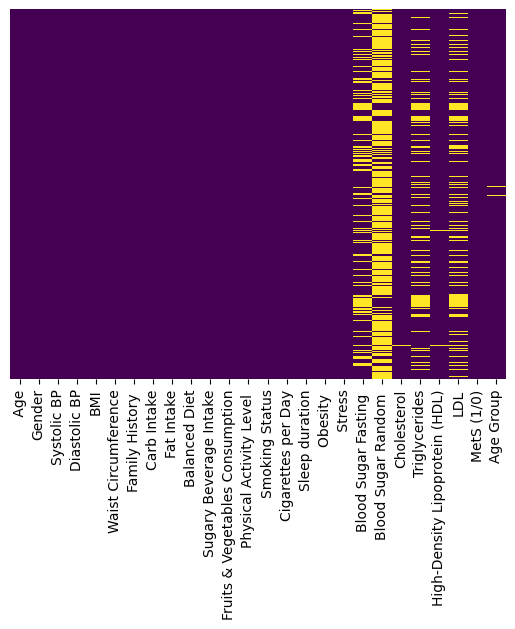

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.describe()

,Age,Gender,Systolic BP,Diastolic BP,BMI,Waist Circumference,Family History,Carb Intake,Fat Intake,Balanced Diet,Sugary Beverage Intake,Fruits & Vegetables Consumption,Physical Activity Level,Smoking Status,Cigarettes per Day,Sleep duration,Obesity,Stress,Blood Sugar Fasting,Blood Sugar Random,Cholesterol,Triglycerides,High-Density Lipoprotein (HDL),LDL,MetS (1/0)
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,376.000000,130.000000,500.000000,394.000000,499.000000,377.000000,502.000000
mean,49.774900,0.569721,129.595618,86.187251,27.385498,90.805817,0.575697,0.308765,0.249004,0.605578,0.229084,1.820717,0.828685,0.073705,0.675299,0.778884,0.366534,0.593625,6.429335,7.419615,5.001420,2.266726,0.987679,2.823554,0.434263
std,14.522854,0.495609,17.436106,11.776562,5.576349,14.155906,0.494730,0.462445,0.432867,0.489214,0.420662,0.906689,0.795781,0.261551,3.273944,0.540673,0.482338,0.491646,2.417112,4.225559,1.252038,1.514055,0.244899,1.220672,0.496154
min,14.000000,0.000000,90.000000,60.000000,14.940000,55.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,2.700000,1.000000,0.500000,0.160000,0.200000,0.000000
25%,40.000000,0.000000,120.000000,80.000000,23.545000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,5.300000,4.200000,1.400000,0.820000,2.100000,0.000000
50%,50.000000,1.000000,120.000000,80.000000,26.430000,88.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.675000,6.100000,4.900000,1.900000,0.980000,2.900000,0.000000
75%,60.000000,1.000000,145.000000,100.000000,30.265000,96.520000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.700000,7.450000,5.700000,2.700000,1.120000,3.400000,1.000000
max,90.000000,1.000000,180.000000,120.000000,51.390000,208.280000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,35.000000,2.000000,1.000000,1.000000,19.300000,28.000000,11.000000,13.500000,2.040000,7.800000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0    Age                             502 non-null    int64   
 1   Gender                           502 non-null    int64   
 2   Systolic BP                      502 non-null    int64   
 3   Diastolic BP                     502 non-null    int64   
 4   BMI                              502 non-null    float64 
 5   Waist Circumference              502 non-null    float64 
 6   Family History                   502 non-null    int64   
 7   Carb Intake                      502 non-null    int64   
 8   Fat Intake                       502 non-null    int64   
 9   Balanced Diet                    502 non-null    int64   
 10  Sugary Beverage Intake           502 non-null    int64   
 11  Fruits & Vegetables Consumption  502 non-null    int64   
 12  Physical

In [ ]:
df.dtypes

,0
Age,int64
Gender,int64
Systolic BP,int64
Diastolic BP,int64
BMI,float64
Waist Circumference,float64
Family History,int64
Carb Intake,int64
Fat Intake,int64
Balanced Diet,int64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Blood Sugar Fasting               126
Blood Sugar Random                372
Cholesterol                         2
Triglycerides                     108
High-Density Lipoprotein (HDL)      3
LDL                               125
Age Group                           4
dtype: int64


In [ ]:
# Check the data types of all columns
print(df.dtypes)

# To list out the categorical and numerical columns separately:

# Categorical columns (object or string types)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Numerical columns (int or float types)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)


 Age                                  int64
Gender                                int64
Systolic BP                           int64
Diastolic BP                          int64
BMI                                 float64
Waist Circumference                 float64
Family History                        int64
Carb Intake                           int64
Fat Intake                            int64
Balanced Diet                         int64
Sugary Beverage Intake                int64
Fruits & Vegetables Consumption       int64
Physical Activity Level               int64
Smoking Status                        int64
Cigarettes per Day                    int64
Sleep duration                        int64
Obesity                               int64
 Stress                               int64
Blood Sugar Fasting                 float64
Blood Sugar Random                  float64
Cholesterol                         float64
Triglycerides                       float64
High-Density Lipoprotein (HDL)  

In [ ]:
#1 means Yes, 0 means no. 0 means Female and 1 means Male, for fruits intake, the values are : 0 = Rarely, 1= 1-3 times a week, 2= 4-6 times a week, 3= Daily, For sleep its : 0 = less than 6 hours, 1= 6-8 hours, 2= More than 8 hours. Similarly for physical health, the values are : 0 = Sedentary, 1 = Lightly, 2= Moderately, 3 - Very active.

In [ ]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')


In [ ]:
# Perform one-hot encoding for the 'Stress' column
#df = pd.get_dummies(df, columns=[' Stress'], prefix='Stress')

# Check the first few rows of the updated DataFrame to see the result
#print(df.head())


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
# Iterate through each column and check for non-numeric values
non_numerical_columns = {}

for col in df.columns:
    # Check if the column is of numeric type
    if not pd.api.types.is_numeric_dtype(df[col]):
        # Store non-numeric values
        non_numerical_columns[col] = df[col].unique()

# Print out non-numerical columns and their unique values
for col, unique_values in non_numerical_columns.items():
    print(f"Column: {col}")
    print(f"Unique Non-Numeric Values: {unique_values}\n")

Column: Age Group
Unique Non-Numeric Values: ['45-59', '18-44', '>60', NaN]
Categories (3, object): ['18-44' < '45-59' < '>60']



In [ ]:
# Delete the 'Age Group' column from the dataset
df = df.drop(columns=['Age Group'])


In [ ]:
# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to the entire dataset
imputed_data = knn_imputer.fit_transform(df)  # Returns a NumPy array

# Create a DataFrame with the imputed data and original column names
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

# Check again for missing values
print(df_imputed.isnull().sum())

 Age                               0
Gender                             0
Systolic BP                        0
Diastolic BP                       0
BMI                                0
Waist Circumference                0
Family History                     0
Carb Intake                        0
Fat Intake                         0
Balanced Diet                      0
Sugary Beverage Intake             0
Fruits & Vegetables Consumption    0
Physical Activity Level            0
Smoking Status                     0
Cigarettes per Day                 0
Sleep duration                     0
Obesity                            0
 Stress                            0
Blood Sugar Fasting                0
Blood Sugar Random                 0
Cholesterol                        0
Triglycerides                      0
High-Density Lipoprotein (HDL)     0
LDL                                0
MetS (1/0)                         0
dtype: int64


In [ ]:
# Rename df_imputed to df
df = df_imputed


In [ ]:
# Dictionary to store non-numerical columns and their unique values
non_numerical_columns = {}

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is not numeric
    if not pd.api.types.is_numeric_dtype(df[col]):
        # Store the unique non-numeric values in the dictionary
        non_numerical_columns[col] = df[col].unique()

# Check if any non-numerical columns were found and print them
if non_numerical_columns:
    for col, unique_values in non_numerical_columns.items():
        print(f"Column: {col}")
        print(f"Unique Non-Numeric Values: {unique_values}\n")
else:
    print("All columns are numeric.")

All columns are numeric.


<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


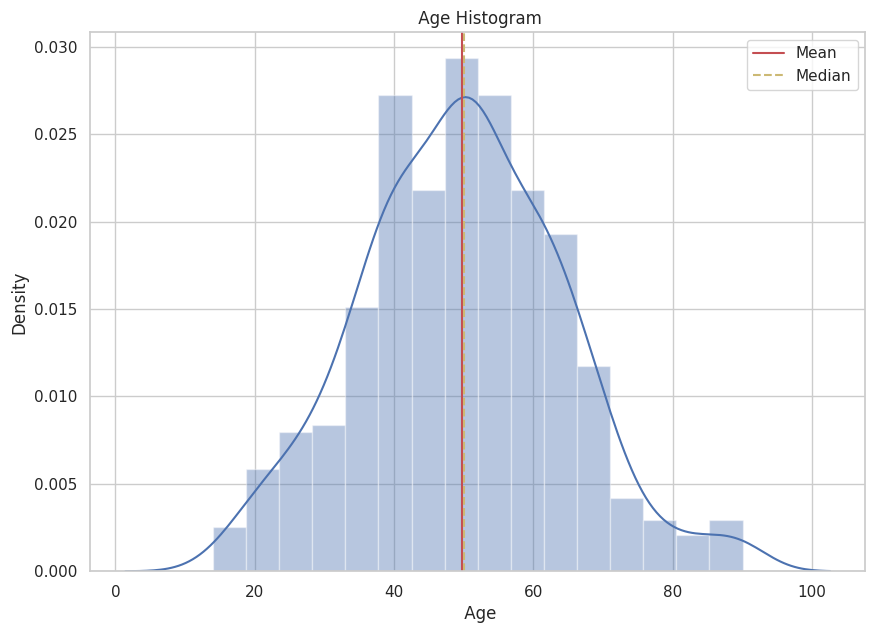

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


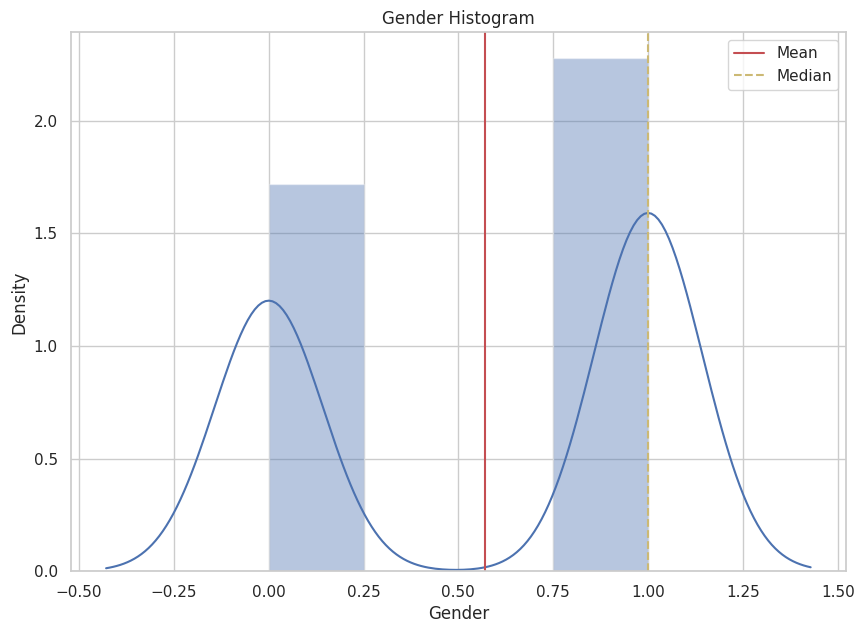

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


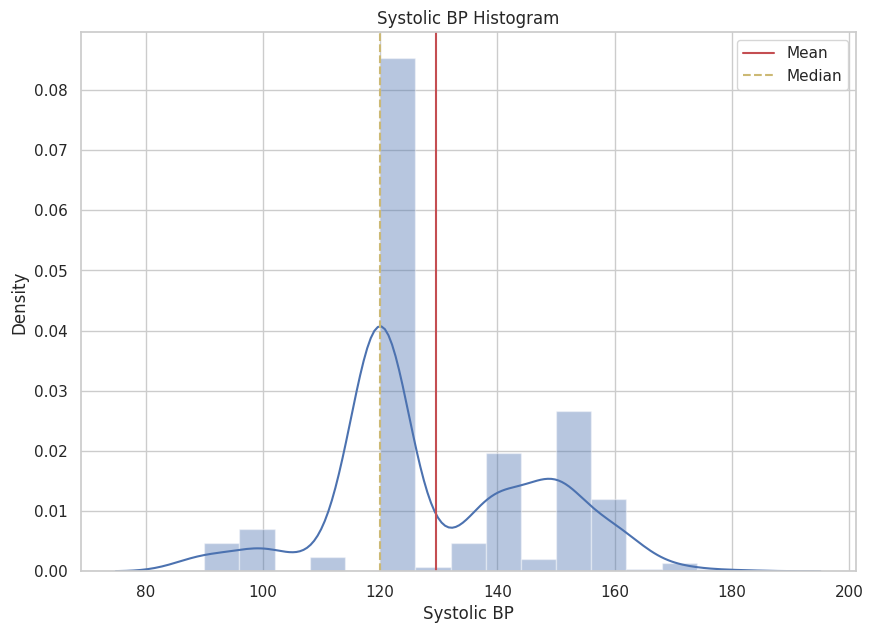

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


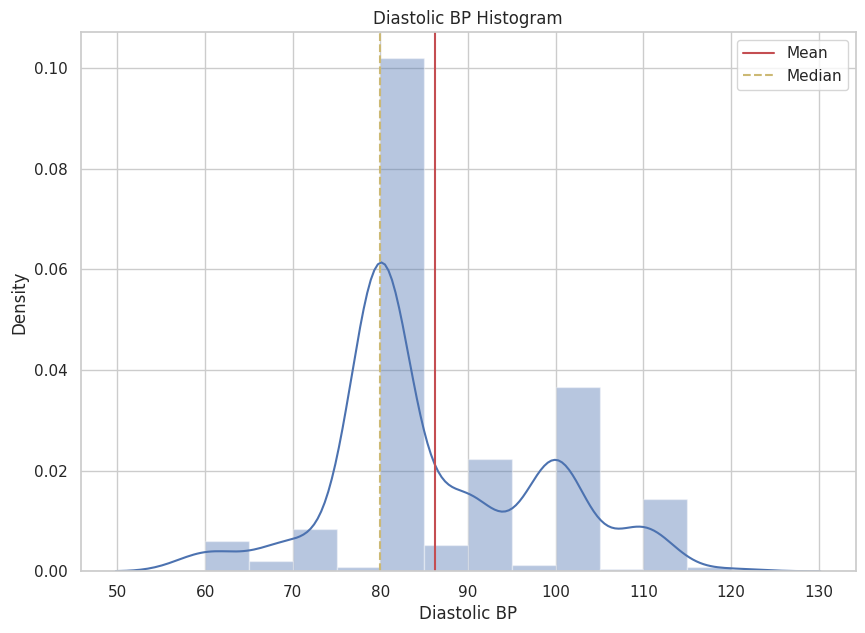

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


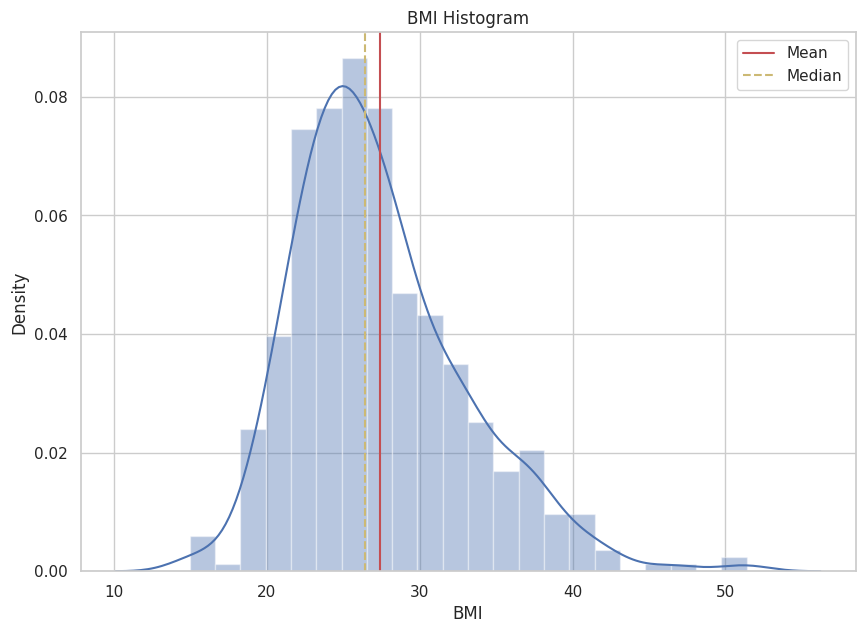

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


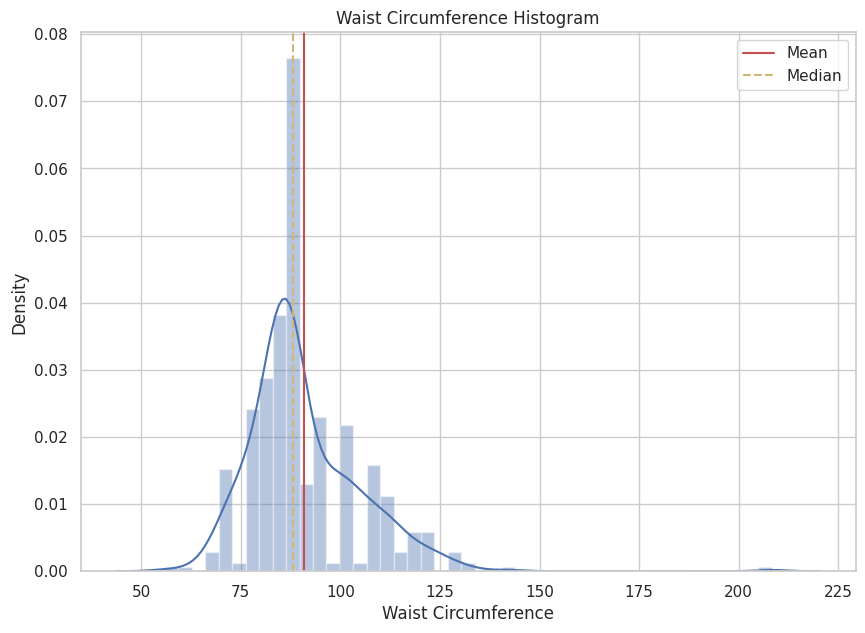

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


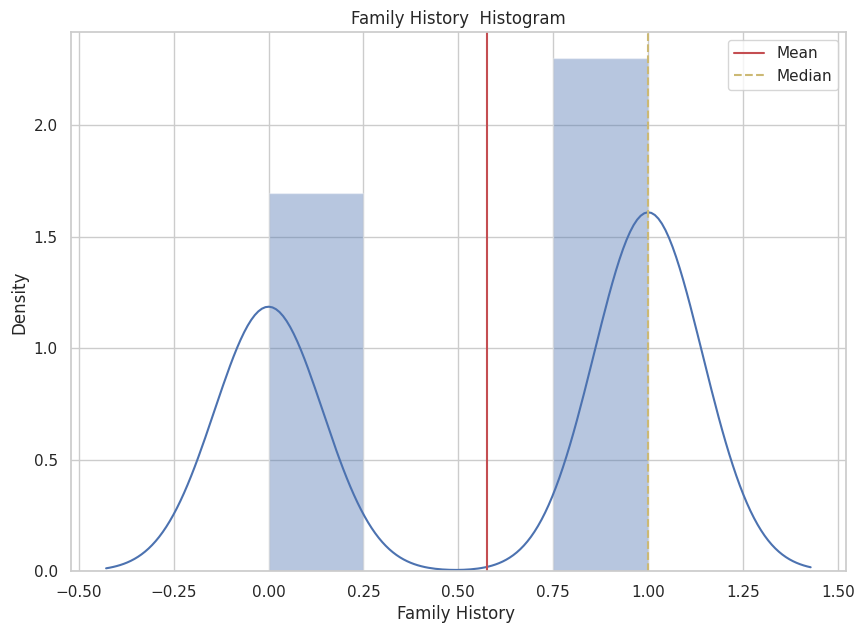

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


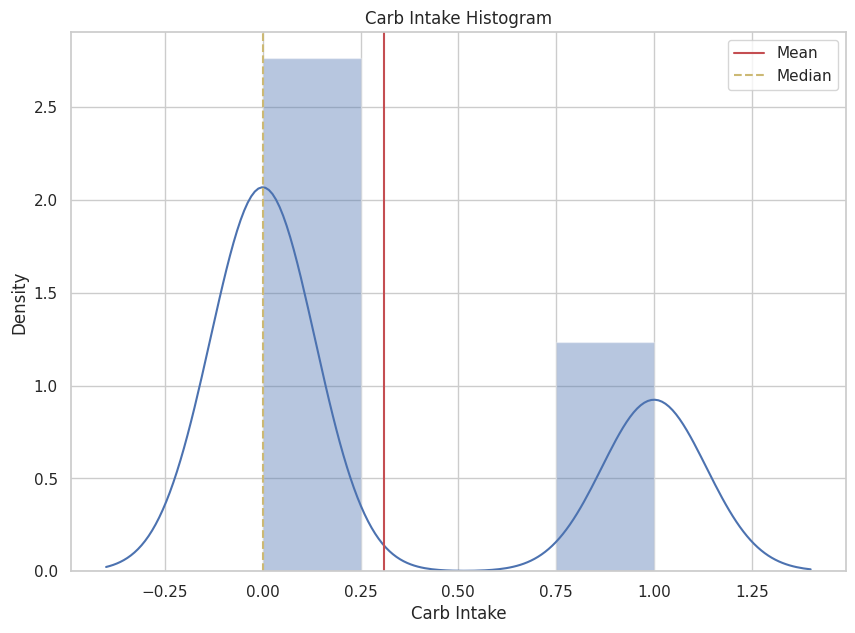

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


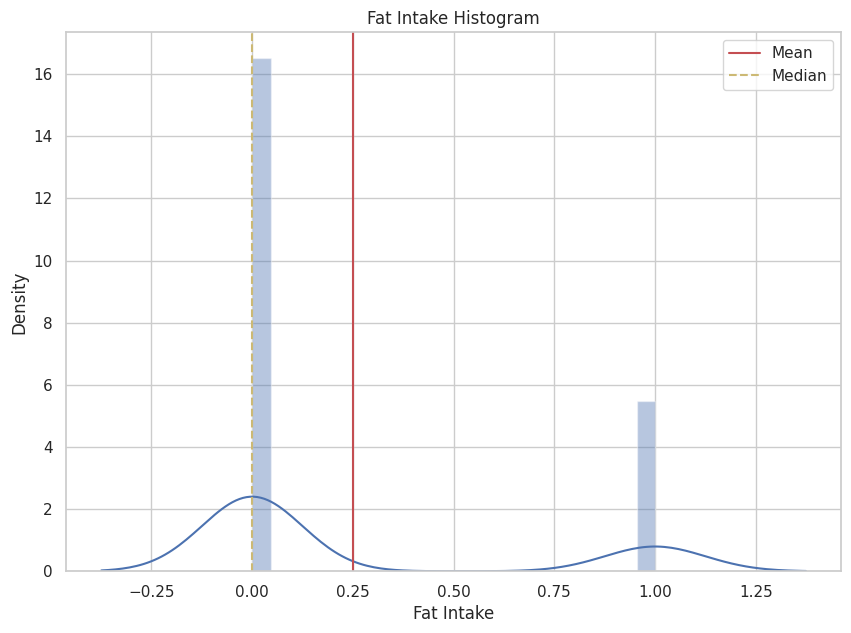

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


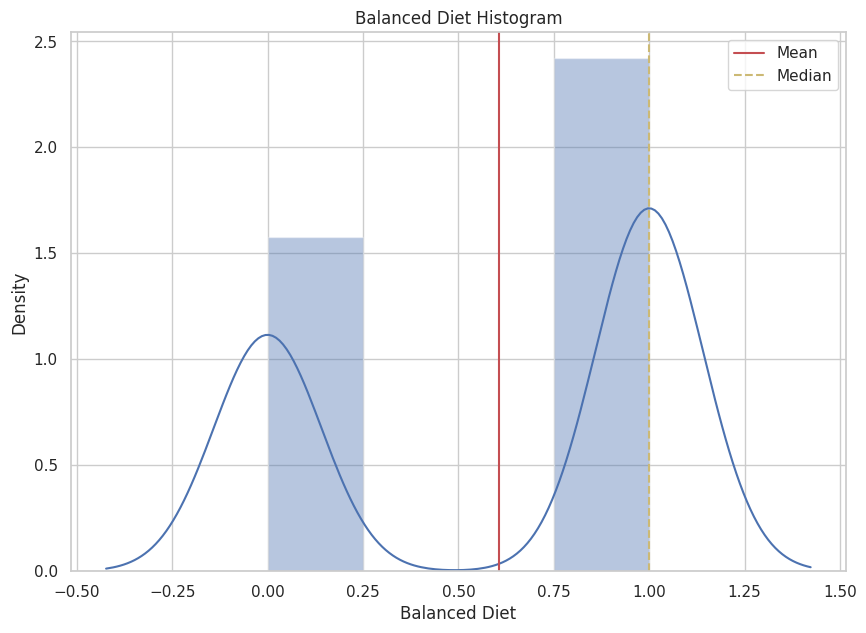

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


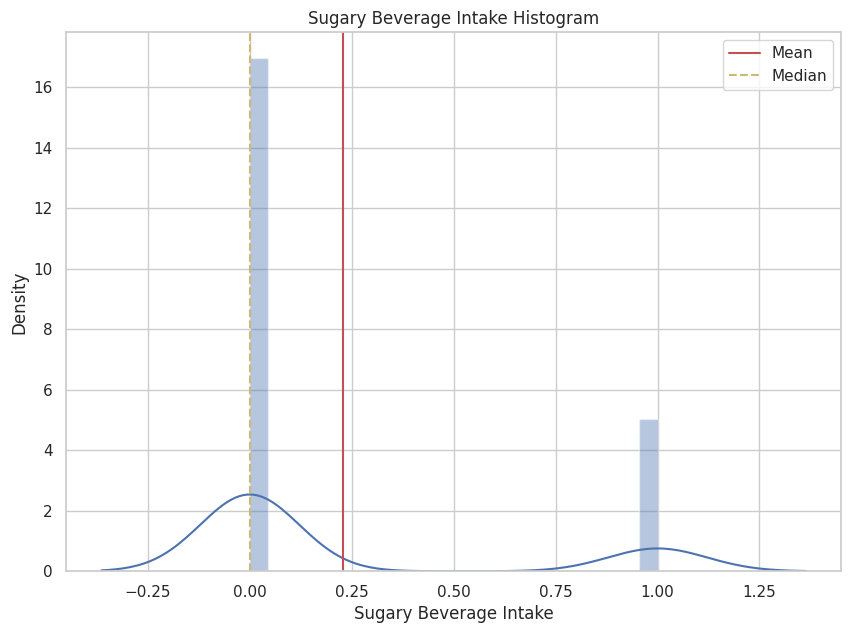

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


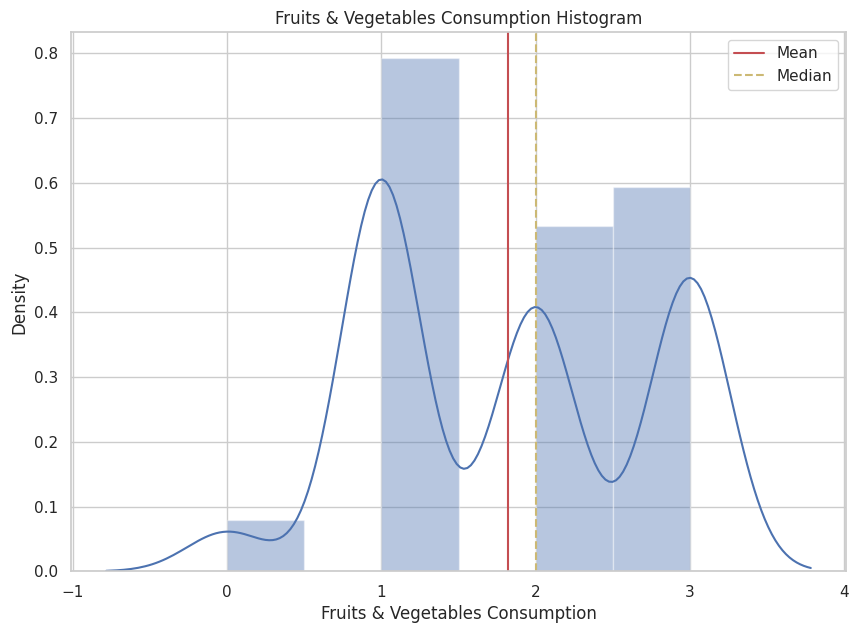

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


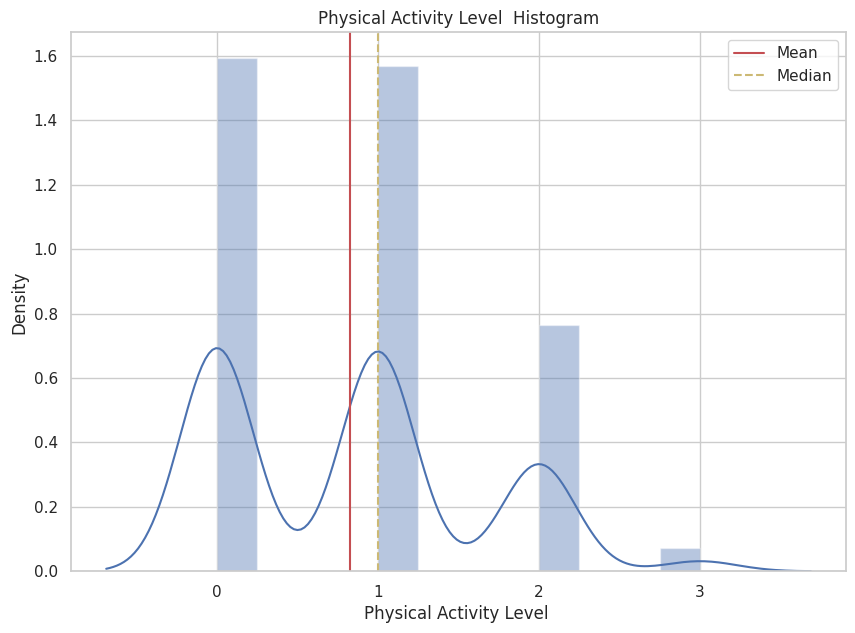

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


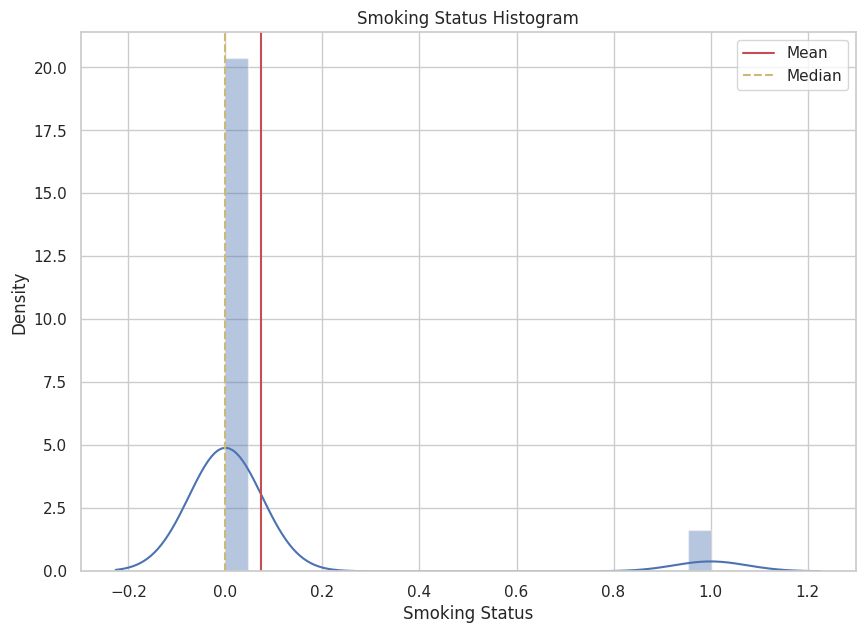

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


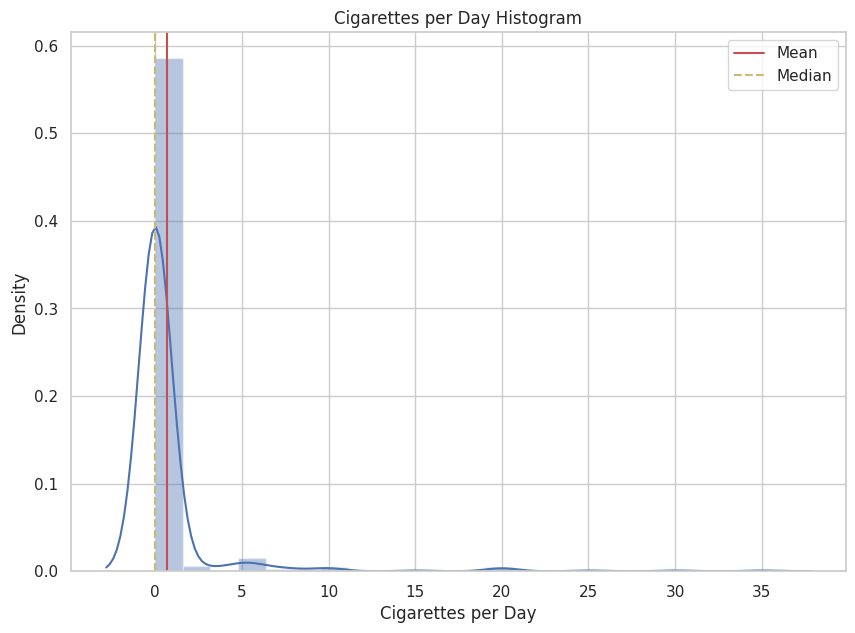

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


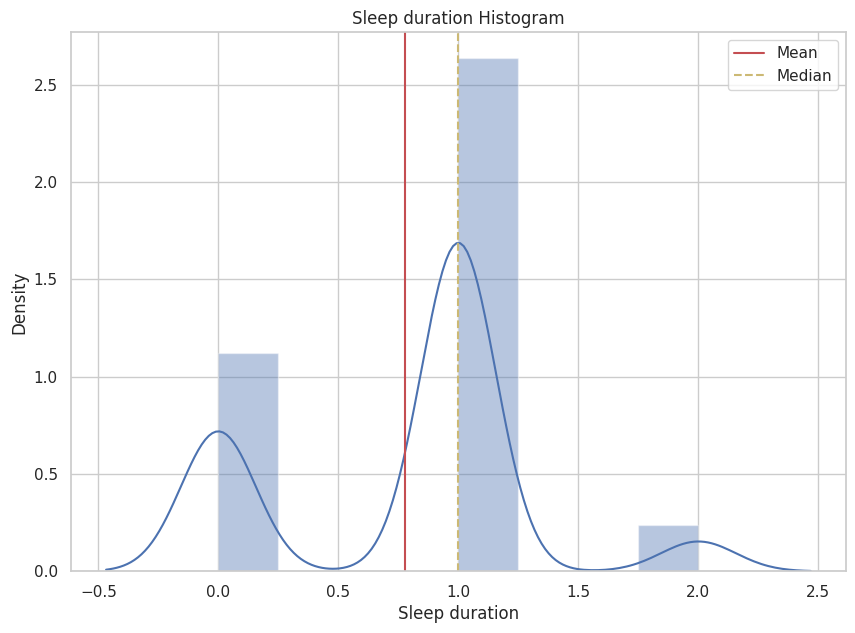

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


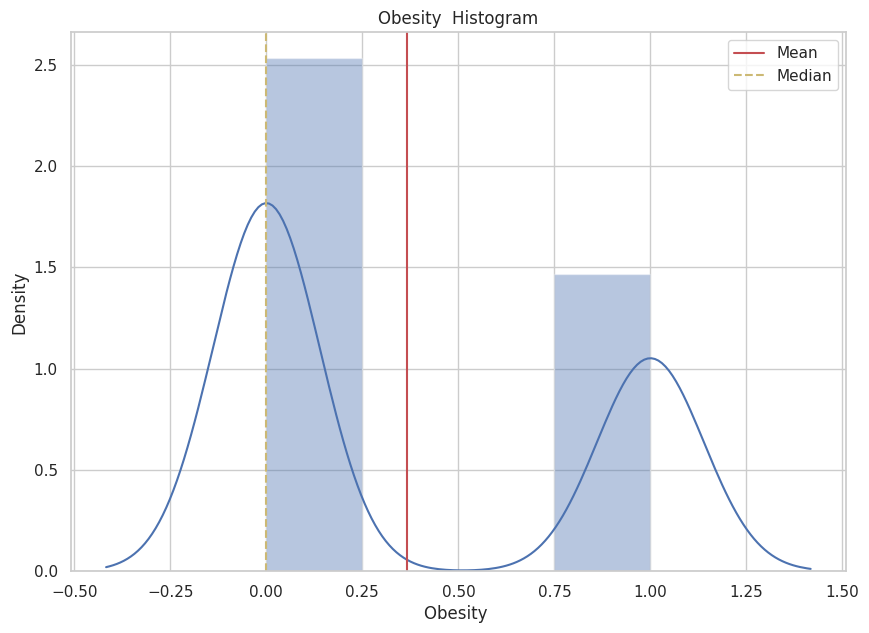

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


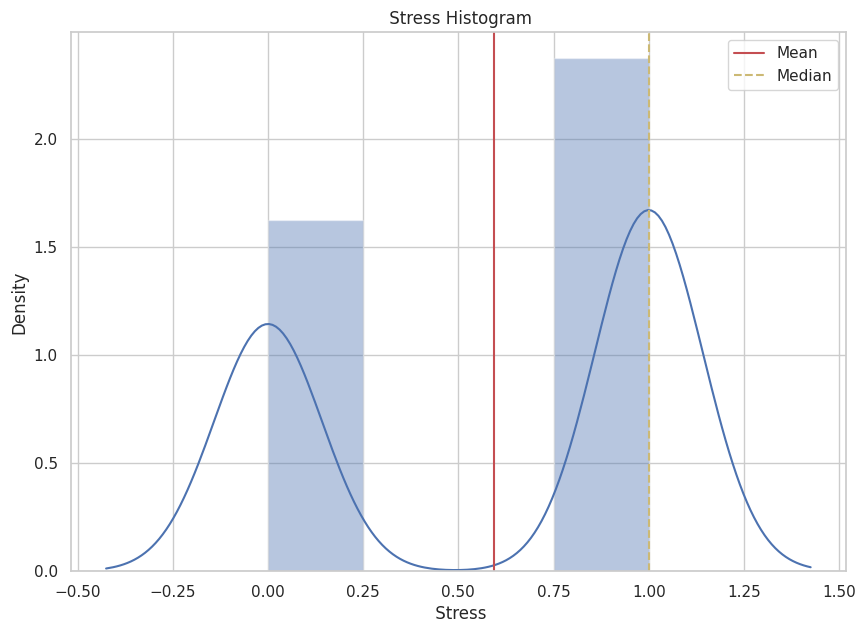

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


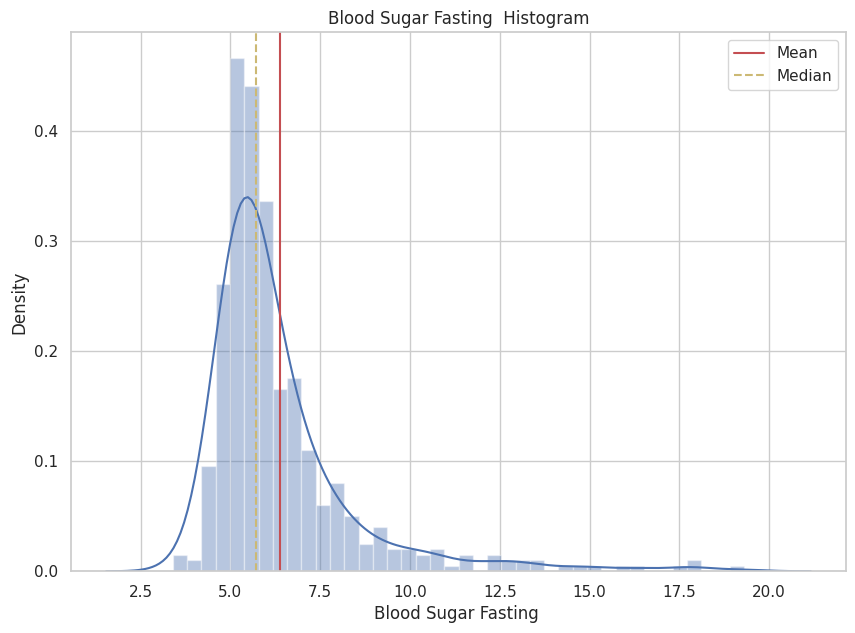

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


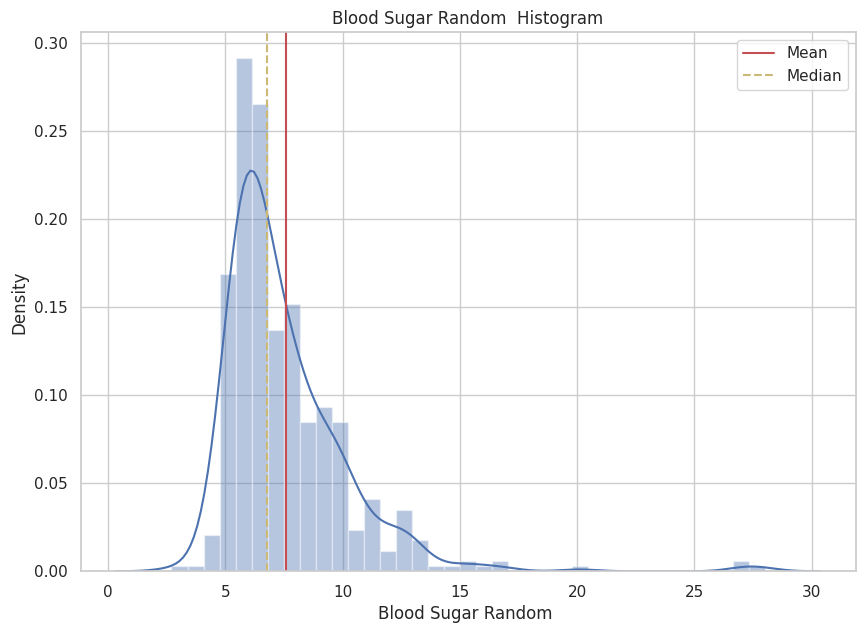

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


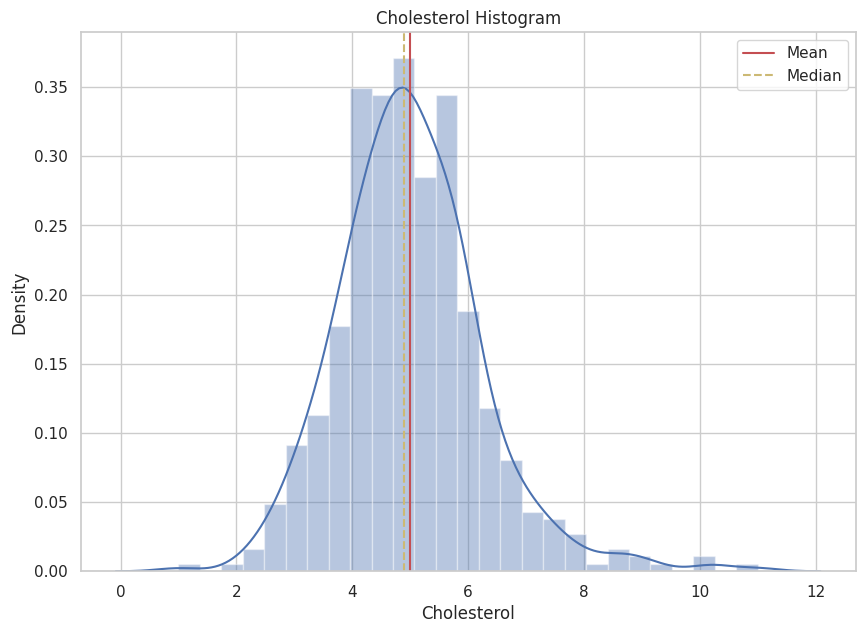

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


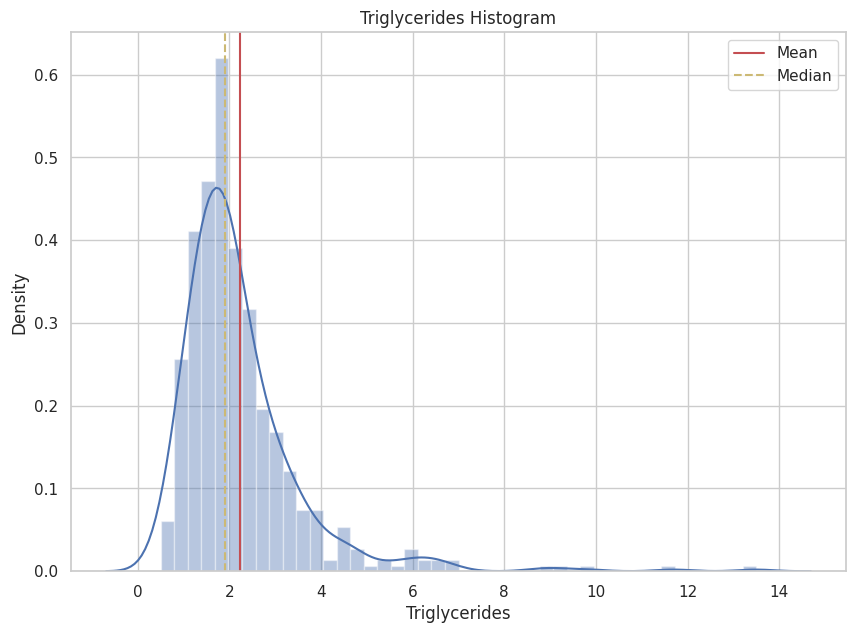

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


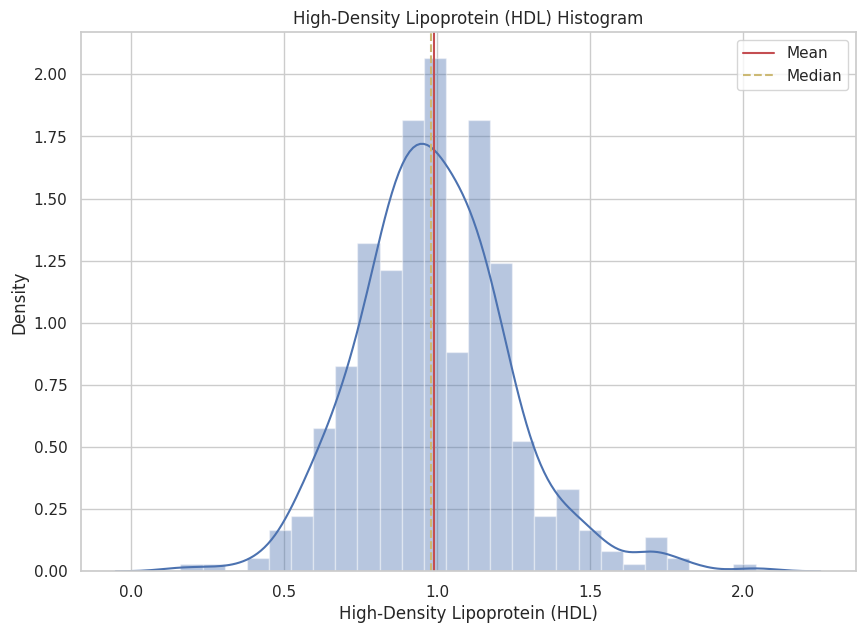

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


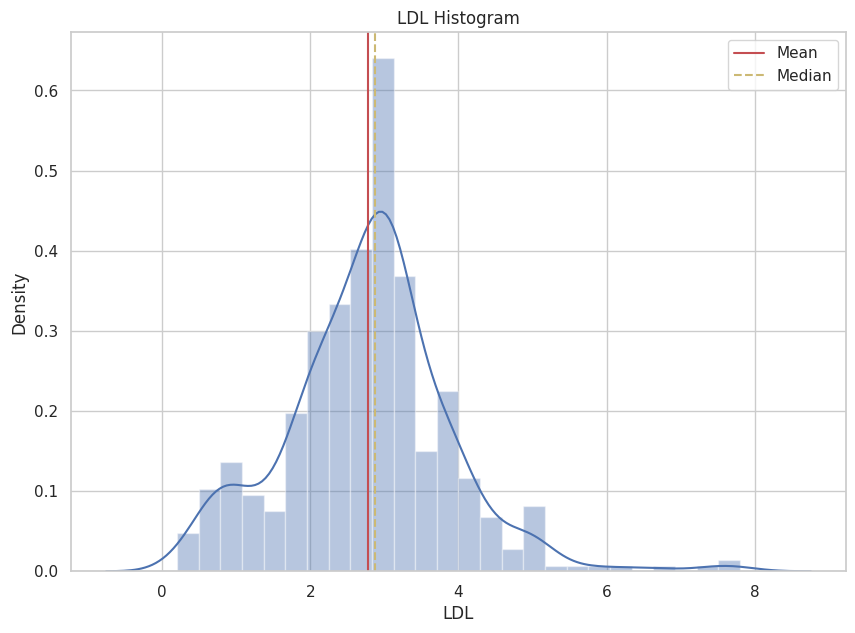

<ipython-input-29-8fd5bd9e8103>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')


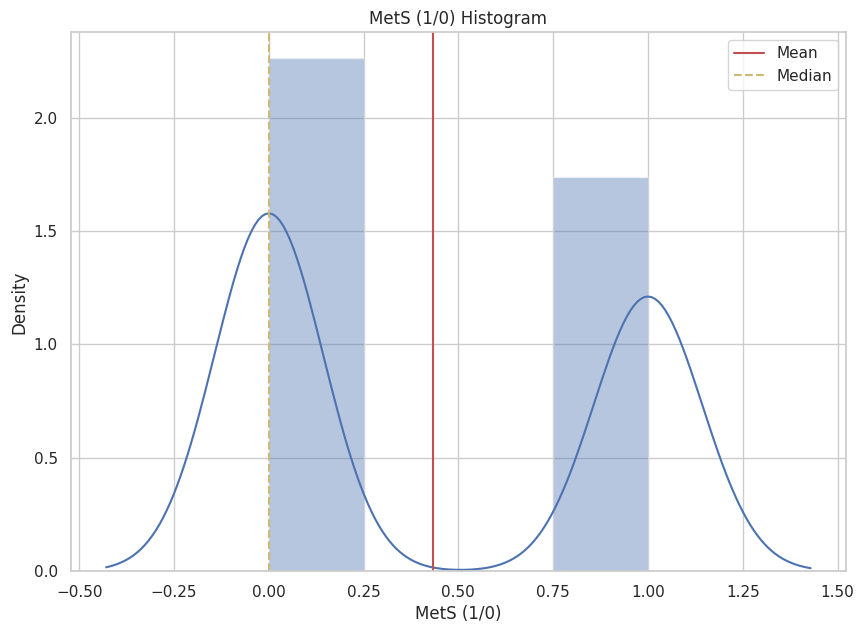

In [ ]:
for col in df:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(df[col].mean(),color='r', label='Mean')
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()


<Axes: xlabel='MetS (1/0)', ylabel='BMI'>

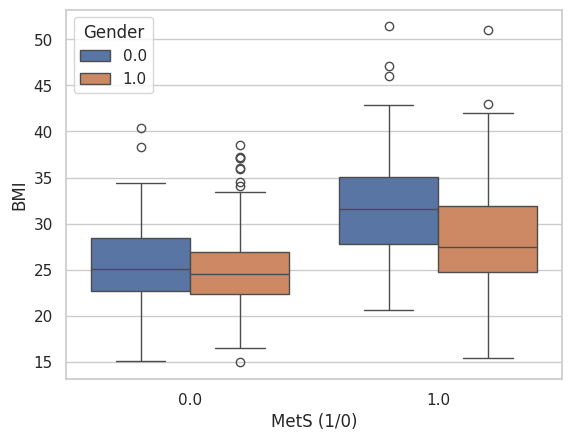

In [ ]:
sns.boxplot(data=df,x='MetS (1/0)',y='BMI', hue='Gender')

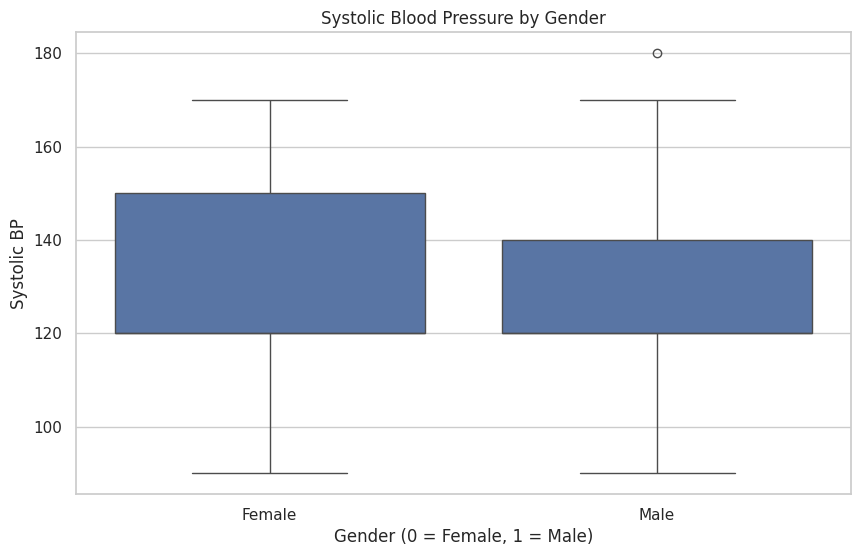

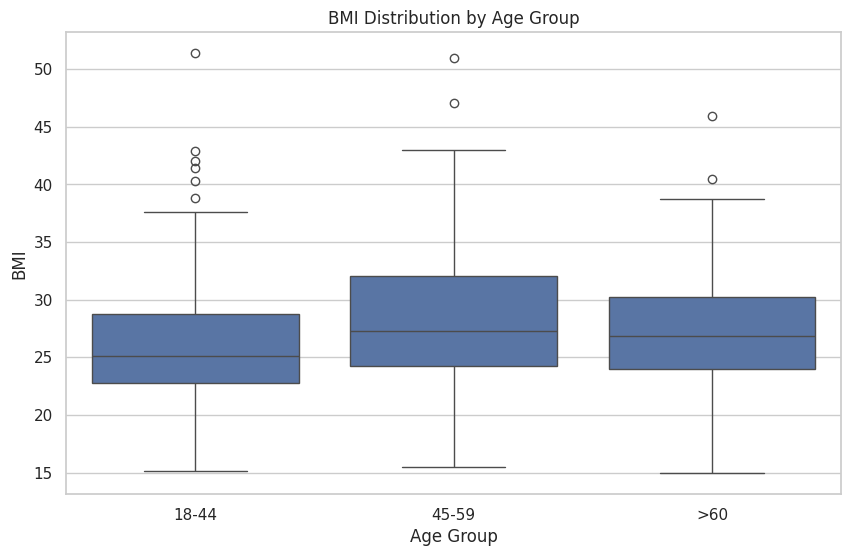

In [ ]:
# Box plot for Systolic BP by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Systolic BP', data=df)
plt.title('Systolic Blood Pressure by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Systolic BP')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Box plot for BMI by Age Group
df['Age Group'] = pd.cut(df[' Age'], bins=[17, 44, 59, 100], labels=['18-44', '45-59', '>60'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='BMI', data=df)
plt.title('BMI Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()


<ipython-input-32-fa43b886f52f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


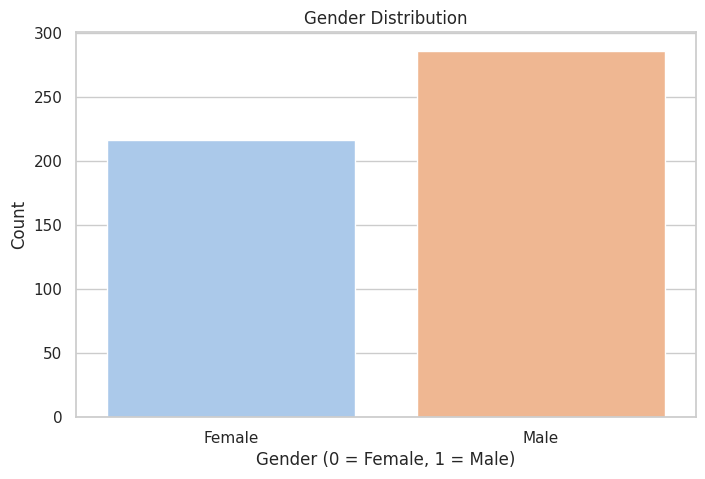

<ipython-input-32-fa43b886f52f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  met_s_age_group = df.groupby(['Age Group', 'MetS (1/0)']).size().unstack()


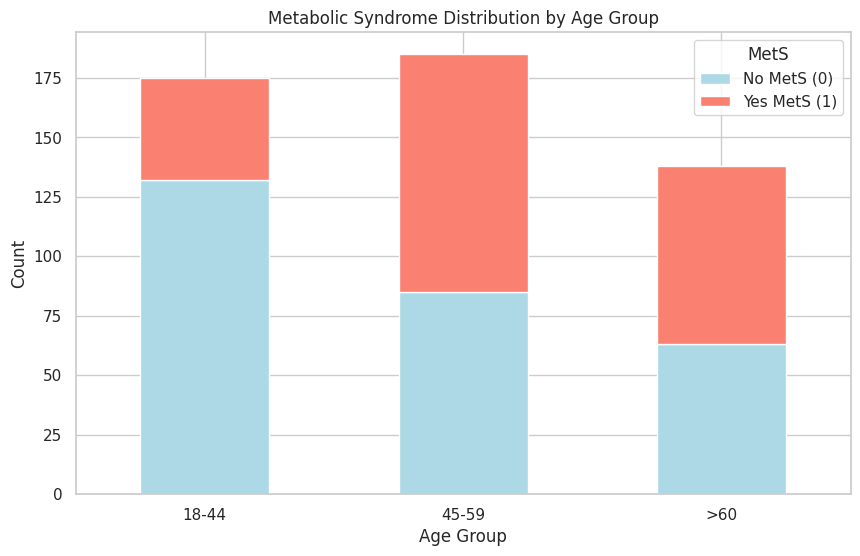

In [ ]:
# Count plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Count')
plt.show()

# Bar graph for MetS Distribution by Age Group
met_s_age_group = df.groupby(['Age Group', 'MetS (1/0)']).size().unstack()
met_s_age_group.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 6))
plt.title('Metabolic Syndrome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No MetS (0)', 'Yes MetS (1)'], title='MetS')
plt.show()


<ipython-input-33-27de5d1c2fc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Physical Activity Level ', data=df, palette='viridis')


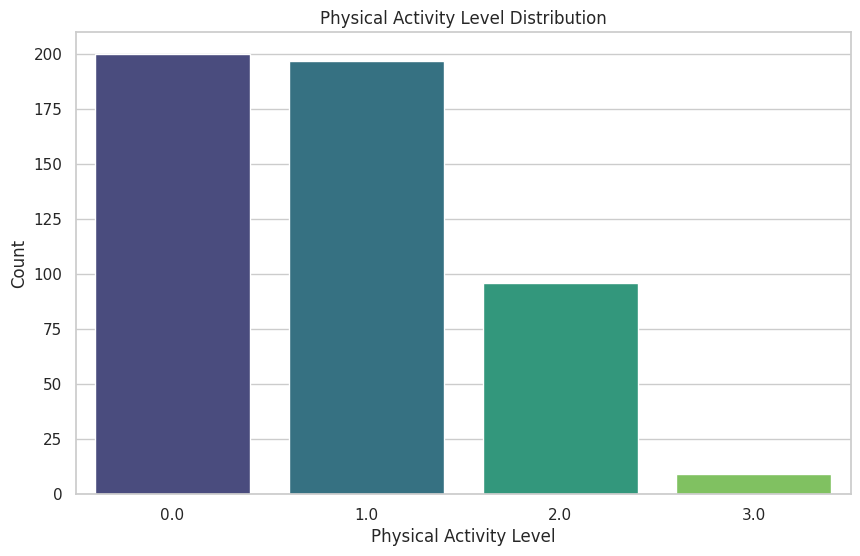

<ipython-input-33-27de5d1c2fc0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family History ', data=df, palette='pastel')


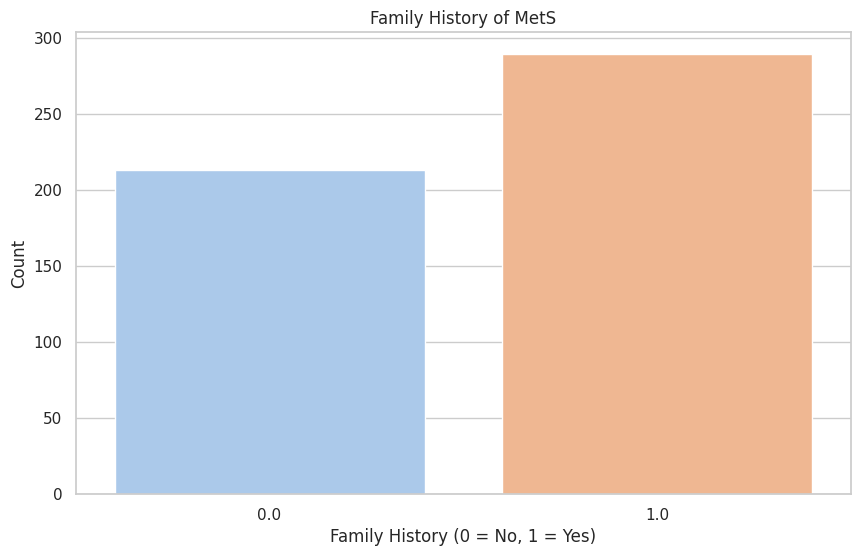

In [ ]:
# Count plot for Physical Activity Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Activity Level ', data=df, palette='viridis')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

# Count plot for Family History
plt.figure(figsize=(10, 6))
sns.countplot(x='Family History ', data=df, palette='pastel')
plt.title('Family History of MetS')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


<ipython-input-34-3539793700a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  activity_counts = sns.countplot(x='Physical Activity Level ', data=df, palette='viridis')
<ipython-input-34-3539793700a0>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  activity_counts.set_xticklabels(activity_labels.values())


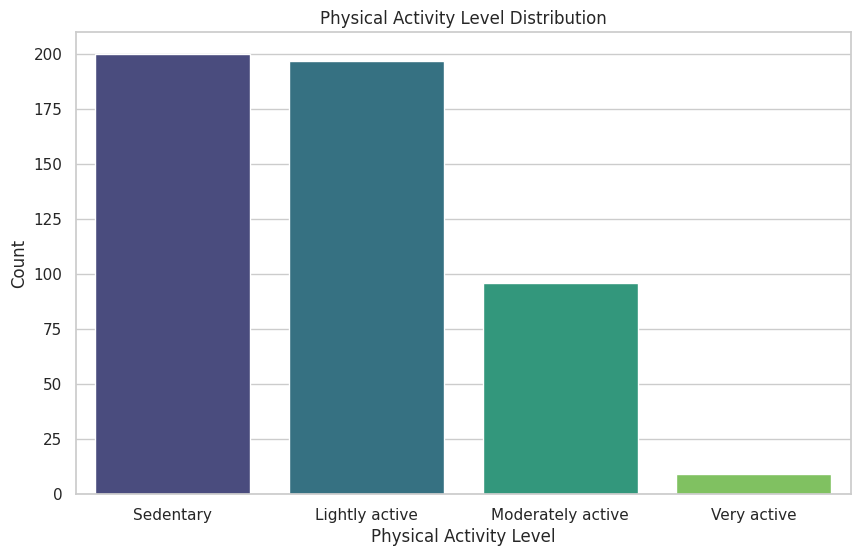

In [ ]:
# Define a mapping for Physical Activity Level
activity_labels = {0: 'Sedentary', 1: 'Lightly active', 2: 'Moderately active', 3: 'Very active'}

# Create a count plot for Physical Activity Level with proper labels
plt.figure(figsize=(10, 6))
activity_counts = sns.countplot(x='Physical Activity Level ', data=df, palette='viridis')

# Update the x-tick labels to show the actual meanings
activity_counts.set_xticklabels(activity_labels.values())

# Adding a legend
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')

plt.show()


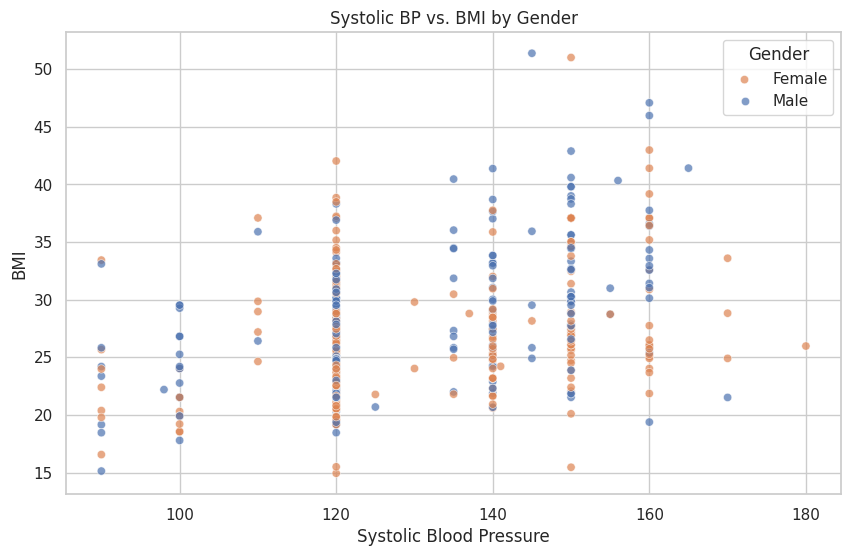

In [ ]:
# Scatter plot for Systolic BP vs. BMI colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='BMI', hue='Gender', data=df, palette='deep', alpha=0.7)
plt.title('Systolic BP vs. BMI by Gender')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('BMI')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


In [ ]:
#' Age', 'Gender', 'Systolic BP', 'Diastolic BP', 'BMI',
       'Waist Circumference', 'Family History ', 'Carb Intake', 'Fat Intake',
       'Balanced Diet', 'Sugary Beverage Intake',
       'Fruits & Vegetables Consumption', 'Physical Activity Level ',
       'Smoking Status', 'Cigarettes per Day', 'Sleep duration', 'Obesity ',
       ' Stress', 'Blood Sugar Fasting ', 'Blood Sugar Random ', 'Cholesterol',
       'Triglycerides', 'High-Density Lipoprotein (HDL)', 'LDL', 'MetS (1/0)'

IndentationError: unexpected indent (<ipython-input-36-a16c5c5a8c16>, line 2)

In [ ]:


# List of features to compare
features = [
    'Waist Circumference', 'Family History ', 'Carb Intake', 'Fat Intake',
    'Balanced Diet', 'Sugary Beverage Intake', 'Fruits & Vegetables Consumption',
    'Physical Activity Level ', 'Smoking Status', 'Cigarettes per Day', 'Sleep duration',
    'Obesity ', 'Blood Sugar Fasting ', 'Blood Sugar Random ',
    'Cholesterol', 'Triglycerides', 'High-Density Lipoprotein (HDL)', 'LDL','Stress_0', 'Stress_1', 'MetS (1/0)'
]

# Melt the DataFrame to have one column for the features
melted_df = df.melt(id_vars=['Gender', 'BMI'], value_vars=features,
                     var_name='Lifestyle Factor', value_name='Value')

# Create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_df, x='Lifestyle Factor', y='BMI', hue='Gender', palette='Set2')

# Enhancing the plot
plt.title('Comparison of BMI across Various Lifestyle Factors by Gender', fontsize=16)
plt.xlabel('Lifestyle Factor', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()


In [ ]:
# Display the names of all columns in the dataset
column_names = df.columns.tolist()
print(column_names)


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetS (1/0)', y='Waist Circumference', hue='Gender', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'MetS'])
plt.title('Waist Circumference Distribution by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Waist Circumference (cm)')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()


In [ ]:
sns.boxplot(data=df,x='MetS (1/0)',y='BMI', hue='Gender')

In [ ]:

# Set the color palette for better aesthetics
palette = sns.color_palette("Set2")

# Create a box plot for BMI by MetS diagnosis, with hue for Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetS (1/0)', y='BMI', hue='Gender', palette=palette)

# Update x-tick labels to be more descriptive
plt.xticks(ticks=[0, 1], labels=['Healthy', 'MetS'])

# Set titles and labels
plt.title('BMI Distribution by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')

# Improve the legend
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])

plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetS (1/0)', y='Cholesterol', hue='Gender', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'MetS'])
plt.title('Cholesterol Levels by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Cholesterol (mg/dL)')
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetS (1/0)', y='Blood Sugar Fasting ', hue='Gender', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'MetS'])
plt.title('Fasting Blood Sugar Levels by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Blood Sugar Fasting (mg/dL)')
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Smoking Status', y='BMI', hue='MetS (1/0)', palette='Set2')
plt.title('BMI Distribution by Smoking Status and Diagnosis')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.legend(title='Diagnosis', loc='upper right', labels=['Healthy', 'MetS'])
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetS (1/0)', y='Fat Intake', hue='Gender', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'MetS'])
plt.title('Fat Intake by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Fat Intake (grams)')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetS (1/0)', y='Triglycerides', hue='Gender', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'MetS'])
plt.title('Triglycerides Levels by Diagnosis and Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Triglycerides (mg/dL)')
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame with necessary data

# List of lifestyle factors
lifestyle_factors = [
    'Waist Circumference', 'Carb Intake', 'Fat Intake',
    'Balanced Diet', 'Sugary Beverage Intake',
    'Fruits & Vegetables Consumption', 'Physical Activity Level ',
    'Smoking Status', 'Cigarettes per Day', 'Sleep duration',
    'Obesity '
]

# Number of lifestyle factors
n_factors = len(lifestyle_factors)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=(n_factors + 1) // 2, ncols=2, figsize=(16, 4 * ((n_factors + 1) // 2)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each lifestyle factor
for i, factor in enumerate(lifestyle_factors):
    sns.boxplot(data=df, x=factor, y='BMI', hue='Gender', palette='Set2', ax=axes[i])
    axes[i].set_title(f'BMI by {factor}', fontsize=16)
    axes[i].set_xlabel(factor, fontsize=14)
    axes[i].set_ylabel('BMI', fontsize=14)
    axes[i].legend(title='Gender', labels=['Female (0)', 'Male (1)'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fat Intake', y='BMI', hue='Gender', palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Low', 'High'])
plt.title('Fat Intake, BMI and Gender')
plt.xlabel('Fat Intake')
plt.ylabel('BMI')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Check data types to find categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

In [ ]:
df.head()

In [ ]:
stophere

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable
target_column = 'MetS (1/0)'  # Change this to your actual target column name

# Select features (all columns except the target)
X = df.drop(columns=[target_column])
y = df[target_column]

# Create an instance of StandardScaler
#scaler = StandardScaler()

# Fit the scaler on the features and transform them
#X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
#X = pd.DataFrame(X_scaled, columns=X.columns)

# Check the standardized data
print(X.head())


    Age  Gender  Systolic BP  Diastolic BP   BMI  Waist Circumference  \
0  54.0     1.0        120.0          80.0  31.8               106.68   
1  27.0     1.0        120.0          67.0  20.9               208.28   
2  50.0     0.0        110.0          65.0  35.9               101.60   
3  26.0     0.0         98.0          64.0  22.2                76.20   
4  27.0     1.0        120.0          80.0  27.3                90.00   

   Family History   Carb Intake  Fat Intake  Balanced Diet  \
0              0.0          0.0         0.0            1.0   
1              0.0          1.0         0.0            0.0   
2              0.0          1.0         0.0            0.0   
3              1.0          1.0         1.0            0.0   
4              1.0          1.0         0.0            0.0   

   Sugary Beverage Intake  Fruits & Vegetables Consumption  \
0                     0.0                              1.0   
1                     0.0                              1.0   
2 

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-validation scores: ", cv_scores)
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.2f}")

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Create confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'MetS'], yticklabels=['Healthy', 'MetS'])
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=['Healthy', 'MetS'])
print(report)


In [ ]:
# Delete the 'Age Group' column from the dataset
df = df.drop(columns=['Age Group'])


Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91        83
         1.0       0.88      0.90      0.89        68

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151

[[75  8]
 [ 7 61]]
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:34:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.91
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        83
         1.0       0.87      0.96      0.91        68

    accuracy                           0.91       151
   macro avg       0.91      0.92      0.91       151
weighted avg       0.92      0.91      0.91       151

[[73 10]
 [ 3 65]]
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.87
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        83
         1.0       0.86      0.84      0.85        68

    accuracy                           0.87       151
   macro avg       0.87      0.86      0.87       151
weighted avg       0.87      0.87      0.87       151

[[74  9]
 [11 57]]
------------------------------------------------------------
SVM Accuracy: 0.77
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81        83
         1.0       0.81      0.65      0.72        68

    accuracy                           0.77       151
   macro avg       0.78      0.76      0.77       151
weighted avg       0.78      0.77      0.77       151

[[73 10]
 [24 44]]
------------------------------------------------------------
KNN Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84        83
    

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.92
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        83
         1.0       0.92      0.90      0.91        68

    accuracy                           0.92       151
   macro avg       0.92      0.92      0.92       151
weighted avg       0.92      0.92      0.92       151

[[78  5]
 [ 7 61]]
------------------------------------------------------------


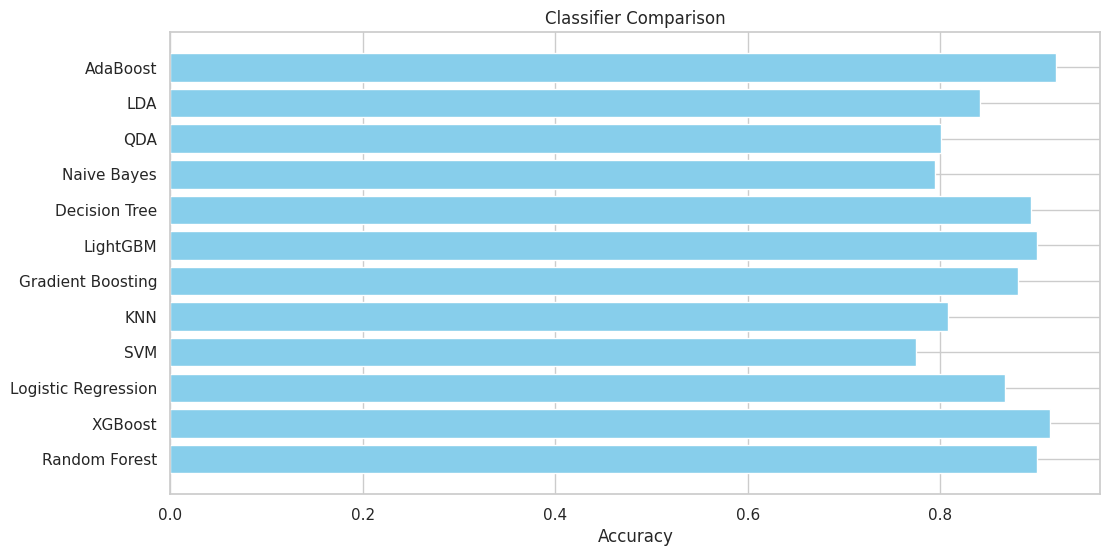

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier

# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 60)

# Compare results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('XGBoost Confusion Matrix', fontweight='bold')
plt.show()


In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate',fontweight='bold')
plt.ylabel('True Positive Rate',fontweight='bold')
plt.title('ROC Curve for XGBoost',fontweight='bold')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# List to store the AUC values
auc_scores = {}

# Train and evaluate each classifier, compute AUC
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

    # Calculate AUC score
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores[name] = auc

# Plot the AUC scores for all models
plt.figure(figsize=(12, 6))
plt.barh(list(auc_scores.keys()), list(auc_scores.values()), color='skyblue')
plt.xlabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')
plt.xlim(0, 1)  # AUC ranges from 0 to 1
plt.show()


In [ ]:
# Define the classifiers (remove the ones not needed for your task)
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Store the AUC values for each model
roc_auc = {}

# Iterate through classifiers, fit, and calculate ROC/AUC
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for positive class (1)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc[name] = auc

    # Calculate ROC curve (false positive rate, true positive rate)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:

# Train, evaluate, and save reports
results = {}
classification_reports = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report

# Convert classification reports to DataFrame for saving
report_df = pd.DataFrame()

for name, report in classification_reports.items():
    temp_df = pd.DataFrame(report).transpose()
    temp_df['Model'] = name  # Add model name for identification
    report_df = pd.concat([report_df, temp_df])

# Save the classification report to an Excel file
report_df.to_excel('classification_reports.xlsx', sheet_name='Reports')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0, 1)  # Limit x-axis to [0, 1]
plt.grid(axis='x')
plt.show()

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(results)))  # Using the viridis colormap
bars = plt.barh(list(results.keys()), list(results.values()), color=colors)

# Add the accuracy value on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Accuracy', fontdict={'fontweight': 'bold'})
plt.title('Classifier Comparison', fontdict={'fontweight': 'bold'})
plt.xlim(0, 1)  # Limit x-axis to [0, 1]
plt.grid(axis='x')
plt.show()

In [ ]:
pip install tensorflow


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define the MLP model
def create_mlp(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change to categorical_crossentropy for multi-class
    return model

# Create and train the model
mlp_model = create_mlp((X_train.shape[1],))
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")  # Threshold for binary classification
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy:.2f}")

# Save classification report
report = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()
classification_report_df.to_excel('mlp_classification_report.xlsx', sheet_name='Reports')




In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Predict probabilities for the positive class
y_pred_prob = mlp_model.predict(X_test).flatten()  # Flatten to ensure correct shape for ROC curve

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# Calculate ROC curve (false positive rate, true positive rate)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'MLP (AUC = {auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate',fontweight='bold')
plt.title('ROC Curve for MLP Model',fontweight='bold')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Predict class labels
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")  # Threshold for binary classification

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('True',fontweight='bold')
plt.title('MLP Confusion Matrix',fontweight='bold')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


In [ ]:
# Extract training history (loss)
history = mlp_model.history  # This will contain training/validation loss

# Training and validation loss
train_loss = history.history['loss']  # Training loss
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for MLP Model')
plt.legend()
plt.show()


In [ ]:
print(mlp_model.history)

In [ ]:
# Print the history object to check the available keys
print(history.history)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Assuming you have saved the training history when fitting the model
# For example: history = mlp_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Get the training loss and validation loss
history = mlp_model.history  # This assumes you have a history object from training
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from keras import layers, models
from keras.optimizers import Adam  # Correct import for Adam optimizer
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Function to create an MLP model with hyperparameters
def create_mlp(input_shape, learning_rate=0.001, dropout_rate=0.2):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(dropout_rate),  # Dropout to prevent overfitting
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)  # Use Adam optimizer correctly
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters
learning_rate = 0.001  # You can adjust this
dropout_rate = 0.2  # You can adjust this

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and train the model
mlp_model = create_mlp((X_train.shape[1],), learning_rate=learning_rate, dropout_rate=dropout_rate)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = mlp_model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])

# Evaluate on test set
test_accuracy = mlp_model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.2f}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
dl_model = Sequential()
dl_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input shape based on number of features
dl_model.add(Dropout(0.5))  # Dropout for regularization
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dropout(0.5))  # Dropout for regularization
dl_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dl_history = dl_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
dl_test_loss, dl_test_accuracy = dl_model.evaluate(X_test, y_test)
print(f"Feedforward Neural Network Test Accuracy: {dl_test_accuracy:.2f}")

# Save classification report
report = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()
classification_report_df.to_excel('fnn_classification_report.xlsx', sheet_name='Reports')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import VotingClassifier
import numpy as np

In [ ]:
# Define first neural network model
def create_model1():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define second neural network model
def create_model2():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create models
model1 = create_model1()
model2 = create_model2()

# Compile the models
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
model1.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
model2.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

# Make predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Average predictions
final_predictions = (pred1 + pred2) / 2
final_predictions = (final_predictions > 0.5).astype(int)  # Convert to binary output

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the ANN model
input_dim = X_train.shape[1]  # Number of features
ann_model = create_ann_model(input_dim)

# Train the model
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model on the test set
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")
ann_accuracy = accuracy_score(y_test, y_pred_ann)

print(f"ANN Model Accuracy: {ann_accuracy:.2f}")
# Save classification report
report = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()
classification_report_df.to_excel('ANN_classification_report.xlsx', sheet_name='Reports')



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Function to generate classification report for a model
def generate_classification_report(model, X_test, y_test, model_name):
    # Get predictions
    y_pred_prob = model.predict(X_test)  # Predict probabilities
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Convert the report dictionary to a DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Add a model name column for clarity
    report_df['Model'] = model_name

    return report_df

# Generate reports for each model
mlp_report = generate_classification_report(mlp_model, X_test, y_test, 'MLP Model')
dl_report = generate_classification_report(dl_model, X_test, y_test, 'Feedforward Neural Network')
ann_report = generate_classification_report(ann_model, X_test, y_test, 'ANN Model')

# Concatenate all reports into a single DataFrame
final_report = pd.concat([mlp_report, dl_report, ann_report])

# Save the report to an Excel file in the current working directory
excel_file_path = 'deep_learning_classification_reports.xlsx'
final_report.to_excel(excel_file_path, index=True)

print(f"Classification reports saved as Excel file: {excel_file_path}")


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Compute Permutation Importance for AdaBoost
ada_importance = permutation_importance(ada_model, X_test, y_test, n_repeats=10, random_state=42)

# Compute Permutation Importance for XGBoost
xgb_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance for AdaBoost
ada_sorted_idx = ada_importance.importances_mean.argsort()
plt.figure(figsize=(12, 6))
plt.barh(range(len(ada_sorted_idx)), ada_importance.importances_mean[ada_sorted_idx], align='center')
plt.yticks(range(len(ada_sorted_idx)), np.array(X_train.columns)[ada_sorted_idx])
plt.title('Permutation Feature Importance for AdaBoost')
plt.xlabel('Mean Importance')
plt.show()

# Plot feature importance for XGBoost
xgb_sorted_idx = xgb_importance.importances_mean.argsort()
plt.figure(figsize=(12, 6))
plt.barh(range(len(xgb_sorted_idx)), xgb_importance.importances_mean[xgb_sorted_idx], align='center')
plt.yticks(range(len(xgb_sorted_idx)), np.array(X_train.columns)[xgb_sorted_idx])
plt.title('Permutation Feature Importance for XGBoost')
plt.xlabel('Mean Importance')
plt.show()

# If you prefer printing out the feature importance for each model:
print("Permutation Feature Importance for AdaBoost:")
for i in ada_sorted_idx:
    print(f"{X_train.columns[i]}: {ada_importance.importances_mean[i]:.4f}")

print("\nPermutation Feature Importance for XGBoost:")
for i in xgb_sorted_idx:
    print(f"{X_train.columns[i]}: {xgb_importance.importances_mean[i]:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:35:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


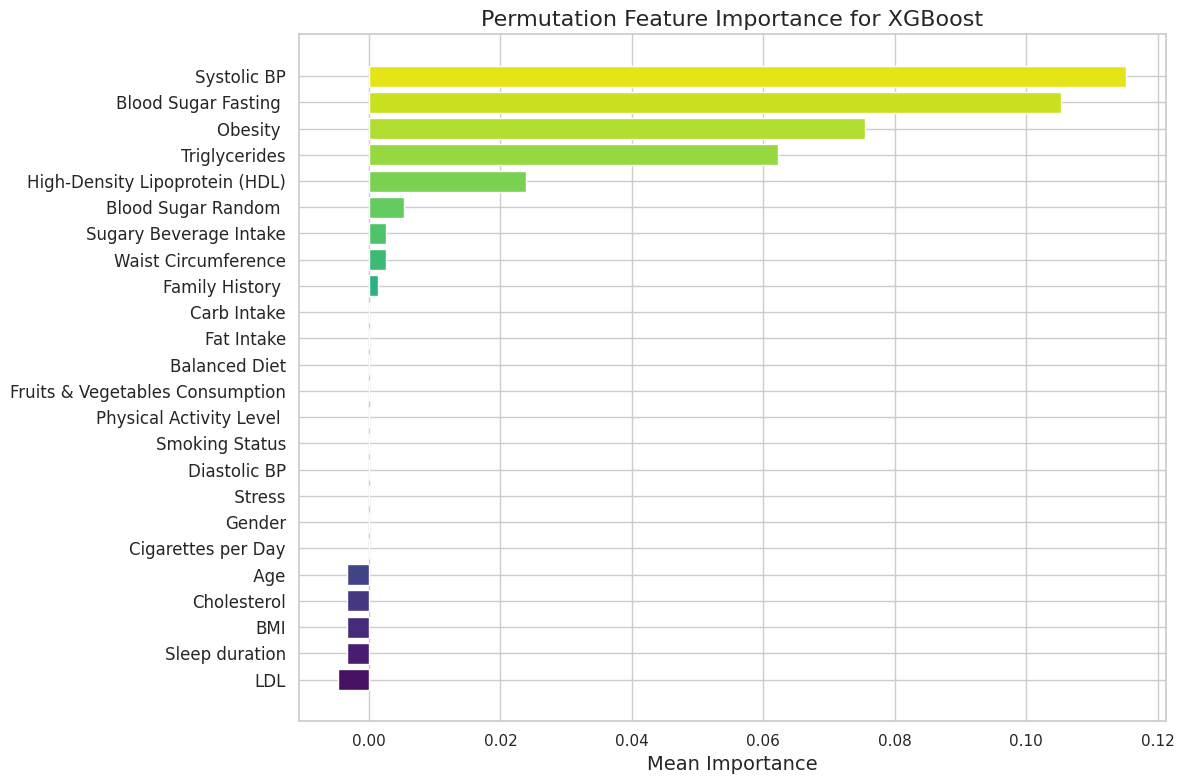

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import permutation_importance

# Define a function to plot feature importance with beautiful colors (without value annotations)
def plot_feature_importance(importance, feature_names, title):
    sorted_idx = importance.importances_mean.argsort()

    # Set the color palette (you can adjust this if needed)
    cmap = sns.color_palette("viridis", len(sorted_idx))

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(sorted_idx)), importance.importances_mean[sorted_idx], color=cmap, align='center')
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], fontsize=12)
    plt.xlabel('Mean Importance', fontsize=14)
    plt.title(title, fontsize=16)

    plt.tight_layout()
    plt.show()


# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Compute Permutation Importance for XGBoost
xgb_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance for XGBoost
plot_feature_importance(xgb_importance, X_train.columns, 'Permutation Feature Importance for XGBoost')


In [ ]:
# Define a function to plot feature importance with beautiful colors (without value annotations)
def plot_feature_importance(importance, feature_names, title):
    sorted_idx = importance.importances_mean.argsort()

    # Set the color palette (you can adjust this if needed)
    cmap = sns.color_palette("viridis", len(sorted_idx))

    plt.figure(figsize=(14, 10))
    plt.barh(range(len(sorted_idx)), importance.importances_mean[sorted_idx], color=cmap, align='center')

    # Make feature names and x-axis label bold
    plt.yticks(range(len(sorted_idx)),
               np.array(feature_names)[sorted_idx],
               fontsize=13, fontweight='bold')
    plt.xlabel('Mean Importance', fontsize=15, fontweight='bold')
    plt.title(title, fontsize=18, fontweight='bold')

    # Add a grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


# Compute Permutation Importance for XGBoost
xgb_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance for XGBoost
plot_feature_importance(xgb_importance, X_train.columns, 'Permutation Feature Importance for XGBoost')

In [ ]:
pip install shap


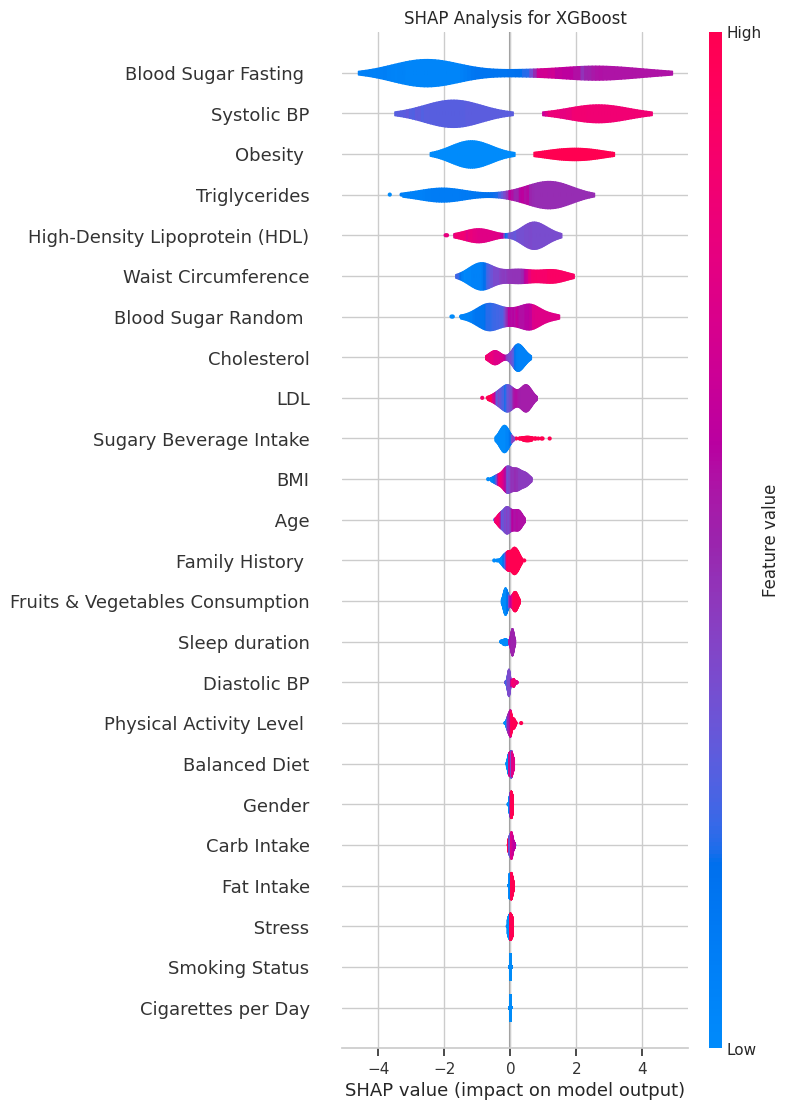

In [ ]:

import shap
import matplotlib.pyplot as plt

# SHAP analysis for XGBoost using TreeExplainer
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)


# Plot SHAP values for XGBoost
shap.summary_plot(shap_values_xgb, X_test, plot_type="violin", show=False, max_display=24)
plt.title("SHAP Analysis for XGBoost")
plt.show()




In [ ]:
import shap
import matplotlib.pyplot as plt

# Explain the model's predictions using SHAP
explainer = shap.Explainer(xgb_model, X)  # Use KernelExplainer or TreeExplainer if applicable
shap_values = explainer(X)

# Summary plot to visualize overall feature importance
shap.summary_plot(shap_values, X)

# Dependence plot for sugary beverage intake
shap.dependence_plot("Sugary Beverage Intake", shap_values.values, X)

# Save the plots
plt.savefig("shap_dependence_sugary_beverage.png")


In [ ]:
# Correlation between sugary beverage intake and other features
correlations = X.corr()

# Extract and sort correlations for 'Sugary Beverage Intake'
sugary_beverage_corr = correlations["Sugary Beverage Intake"].sort_values(ascending=False)

# Print the sorted correlations
print(sugary_beverage_corr)

# Plot the correlations as a horizontal bar chart
plt.figure(figsize=(10, 8))
sugary_beverage_corr.plot(kind="barh", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Correlations with Sugary Beverage Intake", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Add a grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save the plot as an image
plt.savefig("sugary_beverage_correlations.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Save the correlation matrix to a CSV file for further analysis
correlation_matrix.to_csv("correlation_matrix.csv")


In [ ]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title to the heatmap
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Save the heatmap as an image
plt.savefig("correlation_matrix_heatmap.png", dpi=300)

# Show the heatmap
plt.show()


In [ ]:
# Filter correlations by a threshold
threshold = 0.5
significant_corr = sugary_beverage_corr[abs(sugary_beverage_corr) > threshold]

# Plot significant correlations
plt.figure(figsize=(8, 6))
significant_corr.plot(kind="barh", color="salmon", edgecolor="black")
plt.title("Significant Correlations with Sugary Beverage Intake (|r| > 0.5)", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


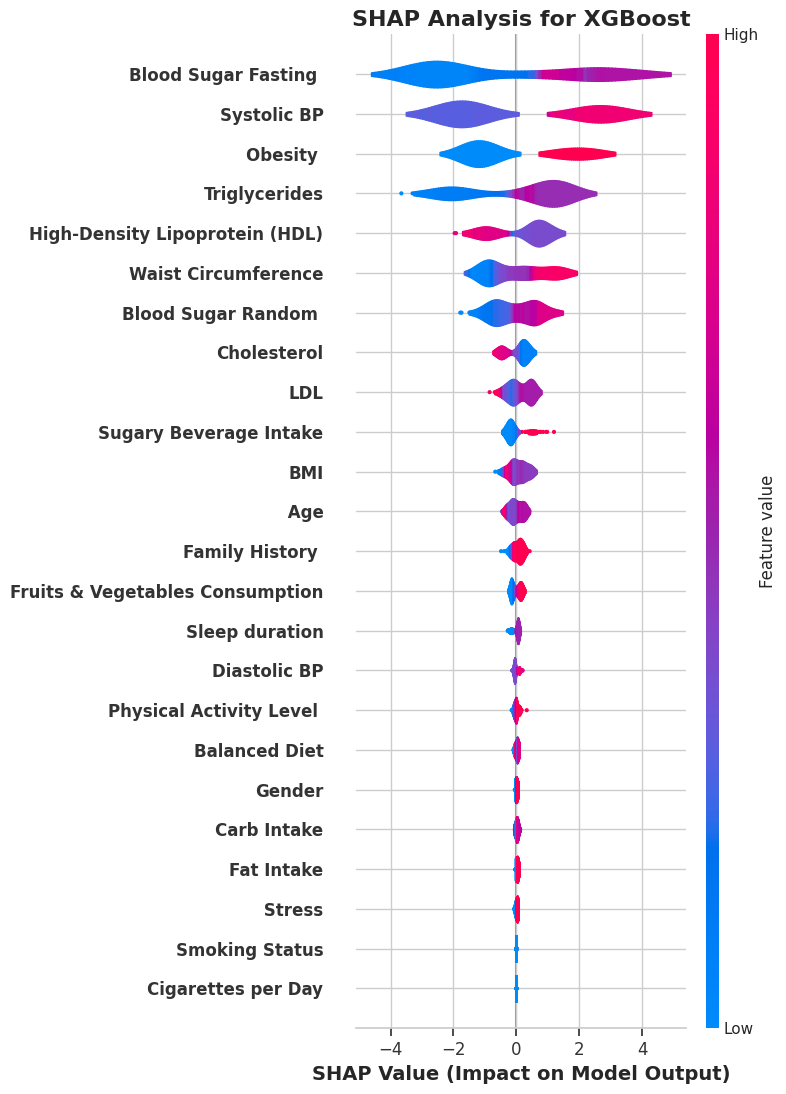

In [ ]:
# Plot SHAP values for XGBoost with bold labels
shap.summary_plot(shap_values_xgb, X_test, plot_type="violin", show=False, max_display=24)

# Customize plot appearance
plt.title("SHAP Analysis for XGBoost", fontsize=16, fontweight='bold')
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=14, fontweight='bold')

# Make feature names and x-axis values bold
plt.gca().set_yticklabels([label.get_text() for label in plt.gca().get_yticklabels()],
                          fontsize=12, fontweight='bold')
plt.gca().xaxis.set_tick_params(labelsize=12, labelrotation=0)
plt.gca().xaxis.label.set_fontweight('bold')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# SHAP Summary Plot (Beeswarm)
shap.summary_plot(shap_values, X_test, plot_size=(14, 10), show=True)


In [ ]:
# Create an explainer for the XGBoost model
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Display all 24 features in the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_size=(14, 10), max_display=24)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named `df`
# Create an Age Group column
df['Age Group'] = pd.cut(df[' Age'], bins=[18, 44, 59, float('inf')],
                         labels=['18-44', '45-59', '60+'])

# Calculate the prevalence for each gender and age group
prevalence_data = df.groupby(['Gender', 'Age Group'])['MetS (1/0)'].mean().reset_index()

# Map Gender column to meaningful labels
prevalence_data['Gender'] = prevalence_data['Gender'].map({0: 'Female', 1: 'Male'})

# Plotting the prevalence of MetS for different gender and age groups
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=prevalence_data, x='Age Group', y='MetS (1/0)', hue='Gender', palette='deep')

# Adding the text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold',
                color='black', xytext=(0, 5),
                textcoords='offset points')

# Adding titles and labels with bold font
plt.title('Prevalence of Metabolic Syndrome (MetS) by Gender and Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Prevalence of MetS', fontsize=14, fontweight='bold')

# Customize the legend
plt.legend(title='Gender', fontsize=12, title_fontsize='13', loc='upper left')

# Set the y-axis labels in bold
plt.gca().yaxis.set_tick_params(labelsize=12)
plt.gca().yaxis.label.set_fontweight('bold')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Assuming your DataFrame is named `df`
column_names = df.columns

# Print the column names
print("Column Names:")
print(column_names)


In [ ]:
# SHAP Waterfall Plot for a single prediction
shap.waterfall_plot(shap_values[0], max_display=24)


In [ ]:
import pandas as pd
import scipy.stats as stats


# Step 2: Filter data for males and females separately
males_df = df[df['Gender'] == 1]
females_df = df[df['Gender'] == 0]

# Step 3: Create contingency tables for age groups vs. MetS for each gender
males_contingency = pd.crosstab(males_df['Age Group'], males_df['MetS (1/0)'])
females_contingency = pd.crosstab(females_df['Age Group'], females_df['MetS (1/0)'])

# Step 4: Perform Chi-Square test for each gender
males_chi2, males_p, males_dof, males_expected = stats.chi2_contingency(males_contingency)
females_chi2, females_p, females_dof, females_expected = stats.chi2_contingency(females_contingency)

# Step 5: Create result tables including observed counts and expected counts
males_result_table = males_contingency.copy()
males_result_table['Expected_0'] = males_expected[:, 0]
males_result_table['Expected_1'] = males_expected[:, 1]

females_result_table = females_contingency.copy()
females_result_table['Expected_0'] = females_expected[:, 0]
females_result_table['Expected_1'] = females_expected[:, 1]

# Step 6: Print the results
print("Males Chi-Square Test Results")
print(f"Chi-Square Statistic: {males_chi2:.2f}, P-Value: {males_p:.4f}, Degrees of Freedom: {males_dof}")

print("\nFemales Chi-Square Test Results")
print(f"Chi-Square Statistic: {females_chi2:.2f}, P-Value: {females_p:.4f}, Degrees of Freedom: {females_dof}")

# Step 7: Save the result tables to an Excel file
with pd.ExcelWriter("MetS_ChiSquare_Results.xlsx") as writer:
    males_result_table.to_excel(writer, sheet_name="Males Results")
    females_result_table.to_excel(writer, sheet_name="Females Results")

print("Results have been saved to 'MetS_ChiSquare_Results.xlsx'")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip()

# Step 1: Create a new DataFrame for plotting
df['Health Status'] = df['MetS (1/0)'].map({0: 'Healthy', 1: 'MetS'})

# Plotting for Males
plt.figure(figsize=(12, 6))
ax_males = sns.countplot(data=df[df['Gender'] == 1], x='Age Group', hue='Health Status', palette='dark')
plt.title("Prevalence of MetS in Males Across Age Groups", fontsize=16)
plt.xlabel("Age Group", fontsize=14, fontweight = 'bold')
plt.ylabel("Count", fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=12, fontweight = 'bold')
plt.yticks(fontsize=12)
plt.legend(title='Health Status', fontsize=12)

# Annotating counts on top of the bars for Males
for p in ax_males.patches:
    ax_males.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black', fontweight = 'bold')

plt.tight_layout()
plt.show()

# Plotting for Females
plt.figure(figsize=(12, 6))
ax_females = sns.countplot(data=df[df['Gender'] == 0], x='Age Group', hue='Health Status', palette='dark')
plt.title("Prevalence of MetS in Females Across Age Groups", fontsize=16)
plt.xlabel("Age Group", fontsize=14, fontweight = 'bold')
plt.ylabel("Count", fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=12, fontweight = 'bold')
plt.yticks(fontsize=12)
plt.legend(title='Health Status', fontsize=12)

# Annotating counts on top of the bars for Females
for p in ax_females.patches:
    ax_females.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', fontweight = 'bold')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Assuming df is your DataFrame containing the dataset
# Clean column names
df.columns = df.columns.str.strip()

# Step 1: Define thresholds for clinical variables based on your criteria
thresholds = {
    'Waist Circumference': {'Male': 90, 'Female': 85},  # Abdominal obesity
    'Blood Sugar Fasting': 6.1,  # Hyperglycemia (Fasting glucose)
    'Blood Sugar Random': 7.8,    # Hyperglycemia (Postprandial glucose)
    'Systolic BP': 130,           # Hypertension (Systolic BP)
    'Diastolic BP': 85,           # Hypertension (Diastolic BP)
    'Triglycerides': 1.70,        # Fasting Triglycerides
    'High-Density Lipoprotein (HDL)': 1.04  # HDL Cholesterol
}

# Step 2: Create binary columns for each clinical variable based on the thresholds
# Create binary columns for waist circumference based on gender
df['Waist Circumference Abnormal'] = np.where(
    ((df['Gender'] == 1) & (df['Waist Circumference'] >= thresholds['Waist Circumference']['Male'])) |
    ((df['Gender'] == 0) & (df['Waist Circumference'] >= thresholds['Waist Circumference']['Female'])),
    1, 0
)

# Create binary columns for other clinical variables
df['Blood Sugar Fasting Abnormal'] = np.where(df['Blood Sugar Fasting'] >= thresholds['Blood Sugar Fasting'], 1, 0)
df['Blood Sugar Random Abnormal'] = np.where(df['Blood Sugar Random'] >= thresholds['Blood Sugar Random'], 1, 0)
df['Systolic BP Abnormal'] = np.where(df['Systolic BP'] >= thresholds['Systolic BP'], 1, 0)
df['Diastolic BP Abnormal'] = np.where(df['Diastolic BP'] >= thresholds['Diastolic BP'], 1, 0)
df['Triglycerides Abnormal'] = np.where(df['Triglycerides'] >= thresholds['Triglycerides'], 1, 0)
df['HDL Abnormal'] = np.where(df['High-Density Lipoprotein (HDL)'] <= thresholds['High-Density Lipoprotein (HDL)'], 1, 0)

# Step 3: Define a function to calculate odds ratios
def calculate_odds_ratios(df, gender_value):
    # Filter data for the specific gender
    df_gender = df[df['Gender'] == gender_value]

    # Prepare the model results
    results = {}

    # Loop through each abnormality feature
    features = [
        'Waist Circumference Abnormal',
        'Blood Sugar Fasting Abnormal',
        'Blood Sugar Random Abnormal',
        'Systolic BP Abnormal',
        'Diastolic BP Abnormal',
        'Triglycerides Abnormal',
        'HDL Abnormal'
    ]

    for feature in features:
        # Logistic regression model
        model = sm.Logit(df_gender['MetS (1/0)'], df_gender[[feature]])
        result = model.fit(disp=0)  # suppress output

        # Calculate odds ratio
        odds_ratio = np.exp(result.params[0])  # exponentiate to get odds ratio
        results[feature] = odds_ratio

    return results

# Step 4: Calculate OR for males (Gender = 1) and females (Gender = 0)
or_males = calculate_odds_ratios(df, 1)
or_females = calculate_odds_ratios(df, 0)

# Step 5: Convert results to DataFrames for easier visualization
or_males_df = pd.DataFrame(list(or_males.items()), columns=['Feature', 'Odds Ratio'])
or_females_df = pd.DataFrame(list(or_females.items()), columns=['Feature', 'Odds Ratio'])

# Optional: Save to Excel
with pd.ExcelWriter('odds_ratios_metS.xlsx') as writer:
    or_males_df.to_excel(writer, sheet_name='Males OR', index=False)
    or_females_df.to_excel(writer, sheet_name='Females OR', index=False)

# Display the results
print("Odds Ratios for Males:")
print(or_males_df)

print("\nOdds Ratios for Females:")
print(or_females_df)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Assuming df is your DataFrame containing the dataset
# Clean column names
df.columns = df.columns.str.strip()

# Step 1: Define thresholds for clinical variables based on your criteria
thresholds = {
    'Waist Circumference': {'Male': 90, 'Female': 85},  # Abdominal obesity
    'Blood Sugar Fasting': 6.1,  # Hyperglycemia (Fasting glucose)
    'Blood Sugar Random': 7.8,    # Hyperglycemia (Postprandial glucose)
    'Systolic BP': 130,           # Hypertension (Systolic BP)
    'Diastolic BP': 85,           # Hypertension (Diastolic BP)
    'Triglycerides': 1.70,        # Fasting Triglycerides
    'High-Density Lipoprotein (HDL)': 1.04  # HDL Cholesterol
}

# Step 2: Create binary columns for each clinical variable based on the thresholds
# Create binary columns for waist circumference based on gender
df['Waist Circumference Abnormal'] = np.where(
    ((df['Gender'] == 1) & (df['Waist Circumference'] >= thresholds['Waist Circumference']['Male'])) |
    ((df['Gender'] == 0) & (df['Waist Circumference'] >= thresholds['Waist Circumference']['Female'])),
    1, 0
)

# Create binary columns for other clinical variables
df['Blood Sugar Fasting Abnormal'] = np.where(df['Blood Sugar Fasting'] >= thresholds['Blood Sugar Fasting'], 1, 0)
df['Blood Sugar Random Abnormal'] = np.where(df['Blood Sugar Random'] >= thresholds['Blood Sugar Random'], 1, 0)
df['Systolic BP Abnormal'] = np.where(df['Systolic BP'] >= thresholds['Systolic BP'], 1, 0)
df['Diastolic BP Abnormal'] = np.where(df['Diastolic BP'] >= thresholds['Diastolic BP'], 1, 0)
df['Triglycerides Abnormal'] = np.where(df['Triglycerides'] >= thresholds['Triglycerides'], 1, 0)
df['HDL Abnormal'] = np.where(df['High-Density Lipoprotein (HDL)'] <= thresholds['High-Density Lipoprotein (HDL)'], 1, 0)

# Add additional features if needed (based on your dataset)
# Assuming features for analysis
# For example, BMI, Smoking Status, Physical Activity Level, etc.
df['BMI Abnormal'] = np.where(df['BMI'] >= 30, 1, 0)  # Example for obesity based on BMI
df['Smoking Status Abnormal'] = np.where(df['Smoking Status'] > 0, 1, 0)  # Assuming >0 cigarettes per day is abnormal
# Add more binary columns for other features you want to analyze...

# Step 3: Define age groups
def assign_age_group(age):
    if age >= 18 and age <= 44:
        return '18–44'
    elif age >= 45 and age <= 59:
        return '45–59'
    else:
        return '60+'

df['Age Group'] = df['Age'].apply(assign_age_group)

# Step 4: Define a function to calculate odds ratios for each gender and age group
def calculate_odds_ratios_by_age_group(df):
    results = []

    for gender_value in [0, 1]:  # Female = 0, Male = 1
        # Filter data for the specific gender
        df_gender = df[df['Gender'] == gender_value]

        # Group by age and compute odds ratios
        for age_group in df_gender['Age Group'].unique():
            df_age_group = df_gender[df_gender['Age Group'] == age_group]

            # Prepare the model results
            features = [
                'Waist Circumference Abnormal',
                'Blood Sugar Fasting Abnormal',
                'Blood Sugar Random Abnormal',
                'Systolic BP Abnormal',
                'Diastolic BP Abnormal',
                'Triglycerides Abnormal',
                'HDL Abnormal',
                'BMI Abnormal',
                'Smoking Status Abnormal',
                # Add any other features you want to include here
            ]

            for feature in features:
                if feature in df_age_group.columns:
                    # Logistic regression model
                    model = sm.Logit(df_age_group['MetS (1/0)'], df_age_group[[feature]])
                    try:
                        result = model.fit(disp=0)  # suppress output
                        # Calculate odds ratio
                        odds_ratio = np.exp(result.params[0])  # exponentiate to get odds ratio
                        results.append({
                            'Gender': 'Male' if gender_value == 1 else 'Female',
                            'Age Group': age_group,
                            'Feature': feature,
                            'Odds Ratio': odds_ratio
                        })
                    except Exception as e:
                        print(f"Error fitting model for {feature}, {gender_value}, {age_group}: {e}")

    return pd.DataFrame(results)

# Step 5: Calculate OR for all age groups
or_results_df = calculate_odds_ratios_by_age_group(df)

# Optional: Save to Excel
or_results_df.to_excel('odds_ratios_by_age_group_metS.xlsx', index=False)

# Display the results
print(or_results_df)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load your dataset (assuming it's already loaded in a DataFrame named 'df')

# Define a function to calculate Odds Ratios with 95% CI
def calculate_odds_ratios(data, age_group_label, gender_value):
    # Filter data for the specific gender
    gender_data = data[data['Gender'] == gender_value]

    # Define age groups and their conditions
    if age_group_label == 'Age 18–44':
        age_condition = (gender_data['Age'] >= 18) & (gender_data['Age'] <= 44)
    elif age_group_label == 'Age 45–59':
        age_condition = (gender_data['Age'] >= 45) & (gender_data['Age'] <= 59)
    elif age_group_label == 'Age >= 60':
        age_condition = (gender_data['Age'] >= 60)
    else:
        raise ValueError("Invalid age group label")

    # Filter data for the specified age group
    age_group_data = gender_data[age_condition]

    # Define the features and their abnormality conditions
    features = {
        'Waist Circumference Abnormal': (age_group_data['Waist Circumference'] >= 90) if gender_value == 1 else (age_group_data['Waist Circumference'] >= 85),
        'Blood Sugar Fasting Abnormal': (age_group_data['Blood Sugar Fasting'] >= 6.1),
        'Blood Sugar Random Abnormal': (age_group_data['Blood Sugar Random'] >= 7.8),
        'Systolic BP Abnormal': (age_group_data['Systolic BP'] >= 130),
        'Diastolic BP Abnormal': (age_group_data['Diastolic BP'] >= 85),
        'Triglycerides Abnormal': (age_group_data['Triglycerides'] >= 1.70),
        'HDL Abnormal': (age_group_data['High-Density Lipoprotein (HDL)'] <= 1.04),
        'BMI Abnormal': (age_group_data['BMI'] >= 30)  # Assuming threshold for obesity
    }

    # Create a DataFrame to store results
    results = pd.DataFrame(columns=['Feature', 'Odds Ratio', '95% CI'])

    # Calculate OR for each feature
    for feature, condition in features.items():
        # Create a new column for the abnormality condition
        age_group_data[feature] = condition.astype(int)

        # Prepare the data for logistic regression
        y = age_group_data['MetS (1/0)']
        X = sm.add_constant(age_group_data[feature])  # Adding a constant for the intercept

        # Fit the logistic regression model
        model = sm.Logit(y, X).fit(disp=False)

        # Get the odds ratio and 95% CI
        odds_ratio = np.exp(model.params[feature])
        ci_lower = np.exp(model.conf_int().loc[feature][0])
        ci_upper = np.exp(model.conf_int().loc[feature][1])
         #Append results using pd.concat
        result = pd.DataFrame({
            'Feature': [feature],
            'Odds Ratio': [odds_ratio],
            '95% CI': [f'({ci_lower:.2f}, {ci_upper:.2f})']
        })
        results = pd.concat([results, result], ignore_index=True)

    return results

# Calculate Odds Ratios for each age group and gender
age_groups = ['Age 18–44', 'Age 45–59', 'Age >= 60']
male_results = pd.DataFrame()
female_results = pd.DataFrame()

# Loop through age groups and calculate ORs
for age_group in age_groups:
    male_or = calculate_odds_ratios(df, age_group, 1)  # Gender 1 for Males
    female_or = calculate_odds_ratios(df, age_group, 0)  # Gender 0 for Females
    male_or['Age Group'] = age_group
    female_or['Age Group'] = age_group
    male_results = pd.concat([male_results, male_or])
    female_results = pd.concat([female_results, female_or])

# Reshape results for better visualization
male_results_pivot = male_results.pivot(index='Feature', columns='Age Group', values=['Odds Ratio', '95% CI'])
female_results_pivot = female_results.pivot(index='Feature', columns='Age Group', values=['Odds Ratio', '95% CI'])

# Display results
print("Male Odds Ratios:")
print(male_results_pivot)
print("\nFemale Odds Ratios:")
print(female_results_pivot)

# Optionally save to Excel
with pd.ExcelWriter('Odds_Ratios_MetS.xlsx') as writer:
    male_results_pivot.to_excel(writer, sheet_name='Male ORs')
    female_results_pivot.to_excel(writer, sheet_name='Female ORs')


In [ ]:
import statsmodels.api as sm

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb


# Load your dataset (assuming it's already loaded in a DataFrame named 'df')

# Define a function to calculate Odds Ratios with 95% CI
def calculate_odds_ratios(data, age_group_label, gender_value):
    # Filter data for the specific gender
    gender_data = data[data['Gender'] == gender_value]

    # Define age groups and their conditions
    if age_group_label == 'Age 18–44':
        age_condition = (gender_data[' Age'] >= 18) & (gender_data[' Age'] <= 44)
    elif age_group_label == 'Age 45–59':
        age_condition = (gender_data[' Age'] >= 45) & (gender_data[' Age'] <= 59)
    elif age_group_label == 'Age >= 60':
        age_condition = (gender_data[' Age'] >= 60)
    else:
        raise ValueError("Invalid age group label")

    # Filter data for the specified age group
    age_group_data = gender_data[age_condition]

    # Define the features and their abnormality conditions
    features = {
        'Waist Circumference Abnormal': (age_group_data['Waist Circumference'] >= 90) if gender_value == 1 else (age_group_data['Waist Circumference'] >= 85),
        'Blood Sugar Fasting Abnormal': (age_group_data['Blood Sugar Fasting '] >= 6.1),
        'Blood Sugar Random Abnormal': (age_group_data['Blood Sugar Random '] >= 7.8),
        'Systolic BP Abnormal': (age_group_data['Systolic BP'] >= 130),
        'Diastolic BP Abnormal': (age_group_data['Diastolic BP'] >= 85),
        'Triglycerides Abnormal': (age_group_data['Triglycerides'] >= 1.70),
        'HDL Abnormal': (age_group_data['High-Density Lipoprotein (HDL)'] <= 1.04),
        'BMI Abnormal': (age_group_data['BMI'] >= 30)  # Assuming threshold for obesity
    }

    # Create a DataFrame to store results
    results = pd.DataFrame(columns=['Feature', 'Odds Ratio', '95% CI'])

    # Calculate OR for each feature
    for feature, condition in features.items():
        # Create a new column for the abnormality condition
        age_group_data[feature] = condition.astype(int)

        # Prepare the data for XGBoost
        y = age_group_data['MetS (1/0)']
        X = age_group_data[feature].values.reshape(-1, 1)  # Reshape for XGBoost

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the XGBoost model
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)

        # Predict probabilities for the test set
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

        # Calculate Odds Ratio using predicted probabilities
        odds_ratio = np.mean(y_pred_proba) / (1 - np.mean(y_pred_proba))

        # For CI calculation, we can use the standard error of the log odds
        se_log_odds = np.sqrt(1 / (np.mean(y_pred_proba) * len(y_pred_proba)))  # Estimate standard error
        ci_lower = np.exp(np.log(odds_ratio) - 1.96 * se_log_odds)
        ci_upper = np.exp(np.log(odds_ratio) + 1.96 * se_log_odds)

        # Append results using pd.concat
        result = pd.DataFrame({
            'Feature': [feature],
            'Odds Ratio': [odds_ratio],
            '95% CI': [f'({ci_lower:.2f}, {ci_upper:.2f})']
        })
        results = pd.concat([results, result], ignore_index=True)

    return results

# Calculate Odds Ratios for each age group and gender
age_groups = ['Age 18–44', 'Age 45–59', 'Age >= 60']
male_results = pd.DataFrame()
female_results = pd.DataFrame()

# Loop through age groups and calculate ORs
for age_group in age_groups:
    male_or = calculate_odds_ratios(df, age_group, 1)  # Gender 1 for Males
    female_or = calculate_odds_ratios(df, age_group, 0)  # Gender 0 for Females
    male_or['Age Group'] = age_group
    female_or['Age Group'] = age_group
    male_results = pd.concat([male_results, male_or])
    female_results = pd.concat([female_results, female_or])

# Reshape results for better visualization
male_results_pivot = male_results.pivot(index='Feature', columns='Age Group', values=['Odds Ratio', '95% CI'])
female_results_pivot = female_results.pivot(index='Feature', columns='Age Group', values=['Odds Ratio', '95% CI'])

# Display results
print("Male Odds Ratios:")
print(male_results_pivot)
print("\nFemale Odds Ratios:")
print(female_results_pivot)

# Optionally save to Excel
with pd.ExcelWriter('ffffOdds_Ratios_MetS.xlsx') as writer:
    male_results_pivot.to_excel(writer, sheet_name='Male ORs')
    female_results_pivot.to_excel(writer, sheet_name='Female ORs')


In [ ]:
print(df.columns.tolist())

In [ ]:
import pandas as pd
import numpy as np

# Define the accuracy results for each model
model_results = {
    'XGBoost': [0.91, 0.93, 0.93, 0.93, 0.91],
    'Random Forest': [0.89, 0.89, 0.90, 0.90, 0.90],
    'Logistic Regression (LR)': [0.85, 0.85, 0.85, 0.84, 0.85],
    'Support Vector Machine (SVM)': [0.84, 0.82, 0.83, 0.85, 0.85],
    'Gradient Boosting (GB)': [0.88, 0.88, 0.91, 0.91, 0.91],
    'Decision Tree (DT)': [0.89, 0.92, 0.84, 0.84, 0.84],
    'Naive Bayes': [0.79, 0.78, 0.78, 0.79, 0.79],
    'Quadratic Discriminant Analysis (QDA)': [0.80, 0.81, 0.79, 0.79, 0.79],
    'Linear Discriminant Analysis (LDA)': [0.84, 0.84, 0.83, 0.83, 0.83],
    'AdaBoost': [0.92, 0.93, 0.94, 0.94, 0.94],
    'Light GBM': [0.89, 0.90, 0.90, 0.90, 0.90],
}

# Calculate mean and standard deviation for each model
results_summary = {
    'Model': [],
    'Mean Accuracy': [],
    'Standard Deviation': []
}

for model, scores in model_results.items():
    results_summary['Model'].append(model)
    results_summary['Mean Accuracy'].append(np.mean(scores))
    results_summary['Standard Deviation'].append(np.std(scores))

# Create a DataFrame from the results summary
results_df = pd.DataFrame(results_summary)

# Save the results to an Excel file
output_file = 'Model_Accuracy_Results.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Results saved to {output_file}")


In [ ]:
import pandas as pd
import numpy as np

# Define the accuracy results for each deep learning model
dl_model_results = {
    'MLP': [0.87, 0.87, 0.86, 0.87, 0.87],
    'Feed Forward Neural Network': [0.84, 0.84, 0.82, 0.83, 0.84],
    'Artificial Neural Network (ANN)': [0.84, 0.85, 0.85, 0.84, 0.84],
}

# Calculate mean and standard deviation for each model
dl_results_summary = {
    'Model': [],
    'Mean Accuracy': [],
    'Standard Deviation': []
}

for model, scores in dl_model_results.items():
    dl_results_summary['Model'].append(model)
    dl_results_summary['Mean Accuracy'].append(np.mean(scores))
    dl_results_summary['Standard Deviation'].append(np.std(scores))

# Create a DataFrame from the deep learning results summary
dl_results_df = pd.DataFrame(dl_results_summary)

# Save the deep learning results to an Excel file (you can append to the previous file if you want)
output_file_dl = 'Deep_Learning_Model_Accuracy_Results.xlsx'
dl_results_df.to_excel(output_file_dl, index=False)

print(f"Deep learning results saved to {output_file_dl}")
